# 🎵 Music Genre Clustering menggunakan Spotify Dataset

---

## 📖 Pendahuluan

Selamat datang di notebook **Clustering Lagu Spotify**! 

### Apa itu Clustering?
**Clustering** adalah teknik Machine Learning yang digunakan untuk **mengelompokkan data** ke dalam beberapa grup (cluster) berdasarkan kemiripan karakteristiknya. Bayangkan seperti mengelompokkan buah berdasarkan warna - apel merah dengan apel merah, pisang kuning dengan pisang kuning.

### Tujuan Notebook Ini
Kita akan mengelompokkan lagu-lagu Spotify berdasarkan **karakteristik audio** seperti:
- 💃 **Danceability** - Seberapa cocok lagu untuk menari
- ⚡ **Energy** - Seberapa energik lagu tersebut
- 🎸 **Acousticness** - Seberapa akustik (tanpa efek elektronik)
- 🗣️ **Speechiness** - Seberapa banyak kata-kata/lirik
- Dan fitur lainnya...

### Alur Kerja
```
📊 Load Data → 🔍 Eksplorasi Data (EDA) → 🧹 Pembersihan Data → 
⚙️ Preprocessing → 🤖 Clustering → 📈 Evaluasi & Visualisasi
```

---
**Dataset:** Spotify Tracks Dataset  
**Algoritma:** K-Means Clustering  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn

## 📚 Bagian 1: Import Library

Pertama, kita perlu mengimpor semua library yang diperlukan:
- **pandas** & **numpy**: Untuk manipulasi dan analisis data
- **matplotlib** & **seaborn** & **plotly**: Untuk visualisasi data
- **sklearn**: Untuk algoritma machine learning (clustering)

In [1]:
# ============================================================
# LIBRARY UNTUK MANIPULASI DATA
# ============================================================
import numpy as np                  # Operasi matematika dan array
import pandas as pd                 # Manipulasi dataframe/tabel
import warnings
warnings.filterwarnings('ignore')   # Menyembunyikan warning yang tidak penting

# ============================================================
# LIBRARY UNTUK VISUALISASI DATA
# ============================================================
import matplotlib.pyplot as plt     # Visualisasi dasar
import seaborn as sns               # Visualisasi statistik yang lebih bagus
import plotly.express as px         # Visualisasi interaktif
import plotly.graph_objects as go   # Visualisasi interaktif lanjutan

# ============================================================
# LIBRARY UNTUK MACHINE LEARNING (CLUSTERING)
# ============================================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Normalisasi data
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering  # Algoritma clustering
from sklearn.decomposition import PCA           # Reduksi dimensi
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score  # Evaluasi cluster

# Pengaturan tampilan
pd.set_option('display.max_columns', None)      # Tampilkan semua kolom
plt.style.use('seaborn-v0_8-whitegrid')         # Style plot yang bersih
sns.set_palette("husl")                         # Palette warna yang menarik

print("✅ Semua library berhasil diimport!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ Semua library berhasil diimport!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.3.5


---
## 📊 Bagian 2: Memuat dan Memahami Dataset

### 2.1 Load Dataset
Kita akan memuat dataset Spotify yang berisi informasi tentang ribuan lagu beserta karakteristik audionya.

In [2]:
# Memuat dataset dari file CSV
df = pd.read_csv('dataset.csv')

# Menampilkan informasi dasar
print("=" * 60)
print("📁 INFORMASI DATASET SPOTIFY")
print("=" * 60)
print(f"📏 Jumlah Baris (Lagu)    : {df.shape[0]:,}")
print(f"📏 Jumlah Kolom (Fitur)   : {df.shape[1]}")
print("=" * 60)

# Menampilkan 5 baris pertama
print("\n🎵 Preview 5 Lagu Pertama:")
df.head()

📁 INFORMASI DATASET SPOTIFY
📏 Jumlah Baris (Lagu)    : 114,000
📏 Jumlah Kolom (Fitur)   : 21

🎵 Preview 5 Lagu Pertama:


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### 2.2 Memahami Struktur Data

Mari kita lihat informasi tentang setiap kolom dalam dataset:

In [3]:
# Menampilkan informasi struktur data
print("📋 STRUKTUR DATA:")
print("-" * 60)
df.info()

📋 STRUKTUR DATA:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  flo

### 📖 Kamus Data (Data Dictionary)

Berikut penjelasan setiap kolom dalam dataset:

| Kolom | Tipe | Penjelasan |
|-------|------|------------|
| **track_id** | String | ID unik untuk setiap lagu di Spotify |
| **artists** | String | Nama artis/penyanyi |
| **album_name** | String | Nama album |
| **track_name** | String | Judul lagu |
| **popularity** | Integer (0-100) | Seberapa populer lagu (0=tidak populer, 100=sangat populer) |
| **duration_ms** | Integer | Durasi lagu dalam milidetik |
| **explicit** | Boolean | Apakah lagu mengandung konten eksplisit (True/False) |
| **danceability** | Float (0-1) | Seberapa cocok untuk menari (0=tidak cocok, 1=sangat cocok) |
| **energy** | Float (0-1) | Seberapa energik lagu (0=tenang, 1=sangat energik) |
| **key** | Integer (0-11) | Kunci musik (0=C, 1=C#, 2=D, dst.) |
| **loudness** | Float (dB) | Kenyaringan rata-rata dalam desibel |
| **mode** | Integer (0-1) | Mode musik (0=Minor, 1=Major) |
| **speechiness** | Float (0-1) | Keberadaan kata-kata (0=instrumental, 1=podcast/spoken word) |
| **acousticness** | Float (0-1) | Seberapa akustik (0=elektronik, 1=akustik murni) |
| **instrumentalness** | Float (0-1) | Seberapa instrumental (0=vokal dominan, 1=instrumental) |
| **liveness** | Float (0-1) | Kehadiran penonton (0=studio, 1=live performance) |
| **valence** | Float (0-1) | Positivitas musik (0=sedih/marah, 1=senang/ceria) |
| **tempo** | Float (BPM) | Tempo lagu dalam beats per minute |
| **time_signature** | Integer | Birama lagu (3, 4, 5, dll.) |
| **track_genre** | String | Genre lagu |

### 2.3 Statistik Deskriptif

Melihat ringkasan statistik dari kolom numerik:

In [4]:
# Statistik deskriptif untuk kolom numerik
print("📊 STATISTIK DESKRIPTIF:")
print("-" * 60)
df.describe().round(2)

📊 STATISTIK DESKRIPTIF:
------------------------------------------------------------


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00,114000.00
mean,56999.50,33.24,228029.15,0.57,0.64,5.31,-8.26,0.64,0.08,0.31,0.16,0.21,0.47,122.15,3.90
std,32909.11,22.31,107297.71,0.17,0.25,3.56,5.03,0.48,0.11,0.33,0.31,0.19,0.26,29.98,0.43
min,0.00,0.00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,28499.75,17.00,174066.00,0.46,0.47,2.00,-10.01,0.00,0.04,0.02,0.00,0.10,0.26,99.22,4.00
50%,56999.50,35.00,212906.00,0.58,0.68,5.00,-7.00,1.00,0.05,0.17,0.00,0.13,0.46,122.02,4.00
75%,85499.25,50.00,261506.00,0.70,0.85,8.00,-5.00,1.00,0.08,0.60,0.05,0.27,0.68,140.07,4.00
max,113999.00,100.00,5237295.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00,1.00,1.00,243.37,5.00


---
## 🧹 Bagian 3: Data Cleaning (Pembersihan Data)

Sebelum melakukan clustering, kita perlu membersihkan data dari:
1. **Missing Values** - Data yang kosong/hilang
2. **Duplikasi** - Data yang sama terulang
3. **Kolom tidak relevan** - Kolom yang tidak diperlukan untuk analisis

In [5]:
# ============================================================
# 3.1 CEK MISSING VALUES (DATA KOSONG)
# ============================================================
print("🔍 PENGECEKAN MISSING VALUES:")
print("-" * 60)

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Jumlah Missing': missing_values,
    'Persentase (%)': missing_percentage.round(2)
})

# Filter hanya yang memiliki missing values
missing_df_filtered = missing_df[missing_df['Jumlah Missing'] > 0]

if len(missing_df_filtered) > 0:
    print(missing_df_filtered)
else:
    print("✅ Tidak ada missing values dalam dataset!")
    
print(f"\n📊 Total baris dengan missing values: {df.isnull().any(axis=1).sum()}")

🔍 PENGECEKAN MISSING VALUES:
------------------------------------------------------------
            Jumlah Missing  Persentase (%)
artists                  1             0.0
album_name               1             0.0
track_name               1             0.0

📊 Total baris dengan missing values: 1


In [6]:
# ============================================================
# 3.2 HAPUS MISSING VALUES DAN KOLOM TIDAK DIPERLUKAN
# ============================================================

# Buat salinan dataframe
df_clean = df.copy()

# Hapus baris dengan missing values
print(f"📏 Jumlah baris SEBELUM cleaning: {len(df_clean):,}")
df_clean = df_clean.dropna()
print(f"📏 Jumlah baris SETELAH hapus missing values: {len(df_clean):,}")

# Hapus kolom 'Unnamed: 0' jika ada (ini adalah index dari file CSV)
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop('Unnamed: 0', axis=1)
    print("✅ Kolom 'Unnamed: 0' berhasil dihapus")
    
print(f"\n📊 Kolom tersisa: {list(df_clean.columns)}")

📏 Jumlah baris SEBELUM cleaning: 114,000
📏 Jumlah baris SETELAH hapus missing values: 113,999
✅ Kolom 'Unnamed: 0' berhasil dihapus

📊 Kolom tersisa: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [7]:
# ============================================================
# 3.3 CEK DAN HAPUS DATA DUPLIKAT
# ============================================================
print("🔍 PENGECEKAN DATA DUPLIKAT:")
print("-" * 60)

# Cek duplikat berdasarkan semua kolom
duplicate_all = df_clean.duplicated().sum()
print(f"📊 Jumlah baris duplikat (semua kolom): {duplicate_all:,}")

# Cek duplikat berdasarkan track_id
duplicate_track = df_clean['track_id'].duplicated().sum()
print(f"📊 Jumlah track_id duplikat: {duplicate_track:,}")

# Hapus duplikat
df_clean = df_clean.drop_duplicates()
print(f"\n✅ Jumlah baris setelah hapus duplikat: {len(df_clean):,}")

🔍 PENGECEKAN DATA DUPLIKAT:
------------------------------------------------------------
📊 Jumlah baris duplikat (semua kolom): 450
📊 Jumlah track_id duplikat: 24,259

✅ Jumlah baris setelah hapus duplikat: 113,549


In [8]:
# ============================================================
# 3.4 AGREGASI DATA - SATU BARIS PER TRACK
# ============================================================
# Karena satu lagu bisa muncul di beberapa genre, kita perlu menggabungkannya

print("🔄 AGREGASI DATA...")
print("-" * 60)

# Fungsi untuk menggabungkan genre
def combine_genres(series):
    unique_genres = series.unique()
    return ', '.join(unique_genres)

# Cek berapa track yang punya multiple entries
track_counts = df_clean['track_id'].value_counts()
multiple_tracks = track_counts[track_counts > 1]
print(f"📊 Track dengan multiple entries: {len(multiple_tracks):,}")

# Agregasi data berdasarkan track_id
df_aggregated = df_clean.groupby('track_id').agg({
    'artists': 'first',
    'album_name': 'first',
    'track_name': 'first',
    'popularity': 'mean',
    'duration_ms': 'mean',
    'explicit': 'max',
    'danceability': 'mean',
    'energy': 'mean',
    'key': 'first',
    'loudness': 'mean',
    'mode': 'first',
    'speechiness': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean',
    'liveness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'time_signature': 'first',
    'track_genre': combine_genres
}).reset_index()

print(f"✅ Jumlah lagu unik setelah agregasi: {len(df_aggregated):,}")
df_aggregated.head()

🔄 AGREGASI DATA...
------------------------------------------------------------
📊 Track dengan multiple entries: 16,299
✅ Jumlah lagu unik setelah agregasi: 89,740


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44.0,160725.0,True,0.910,0.374,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,german
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47.0,322933.0,False,0.269,0.516,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,club
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22.0,515360.0,False,0.686,0.560,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,minimal-techno
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62.0,190203.0,False,0.679,0.770,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,hip-hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19.0,331240.0,False,0.519,0.431,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,minimal-techno


---
## 🔍 Bagian 4: Exploratory Data Analysis (EDA)

EDA adalah proses untuk memahami data lebih dalam melalui visualisasi dan statistik.

### 4.1 Analisis Fitur Numerik

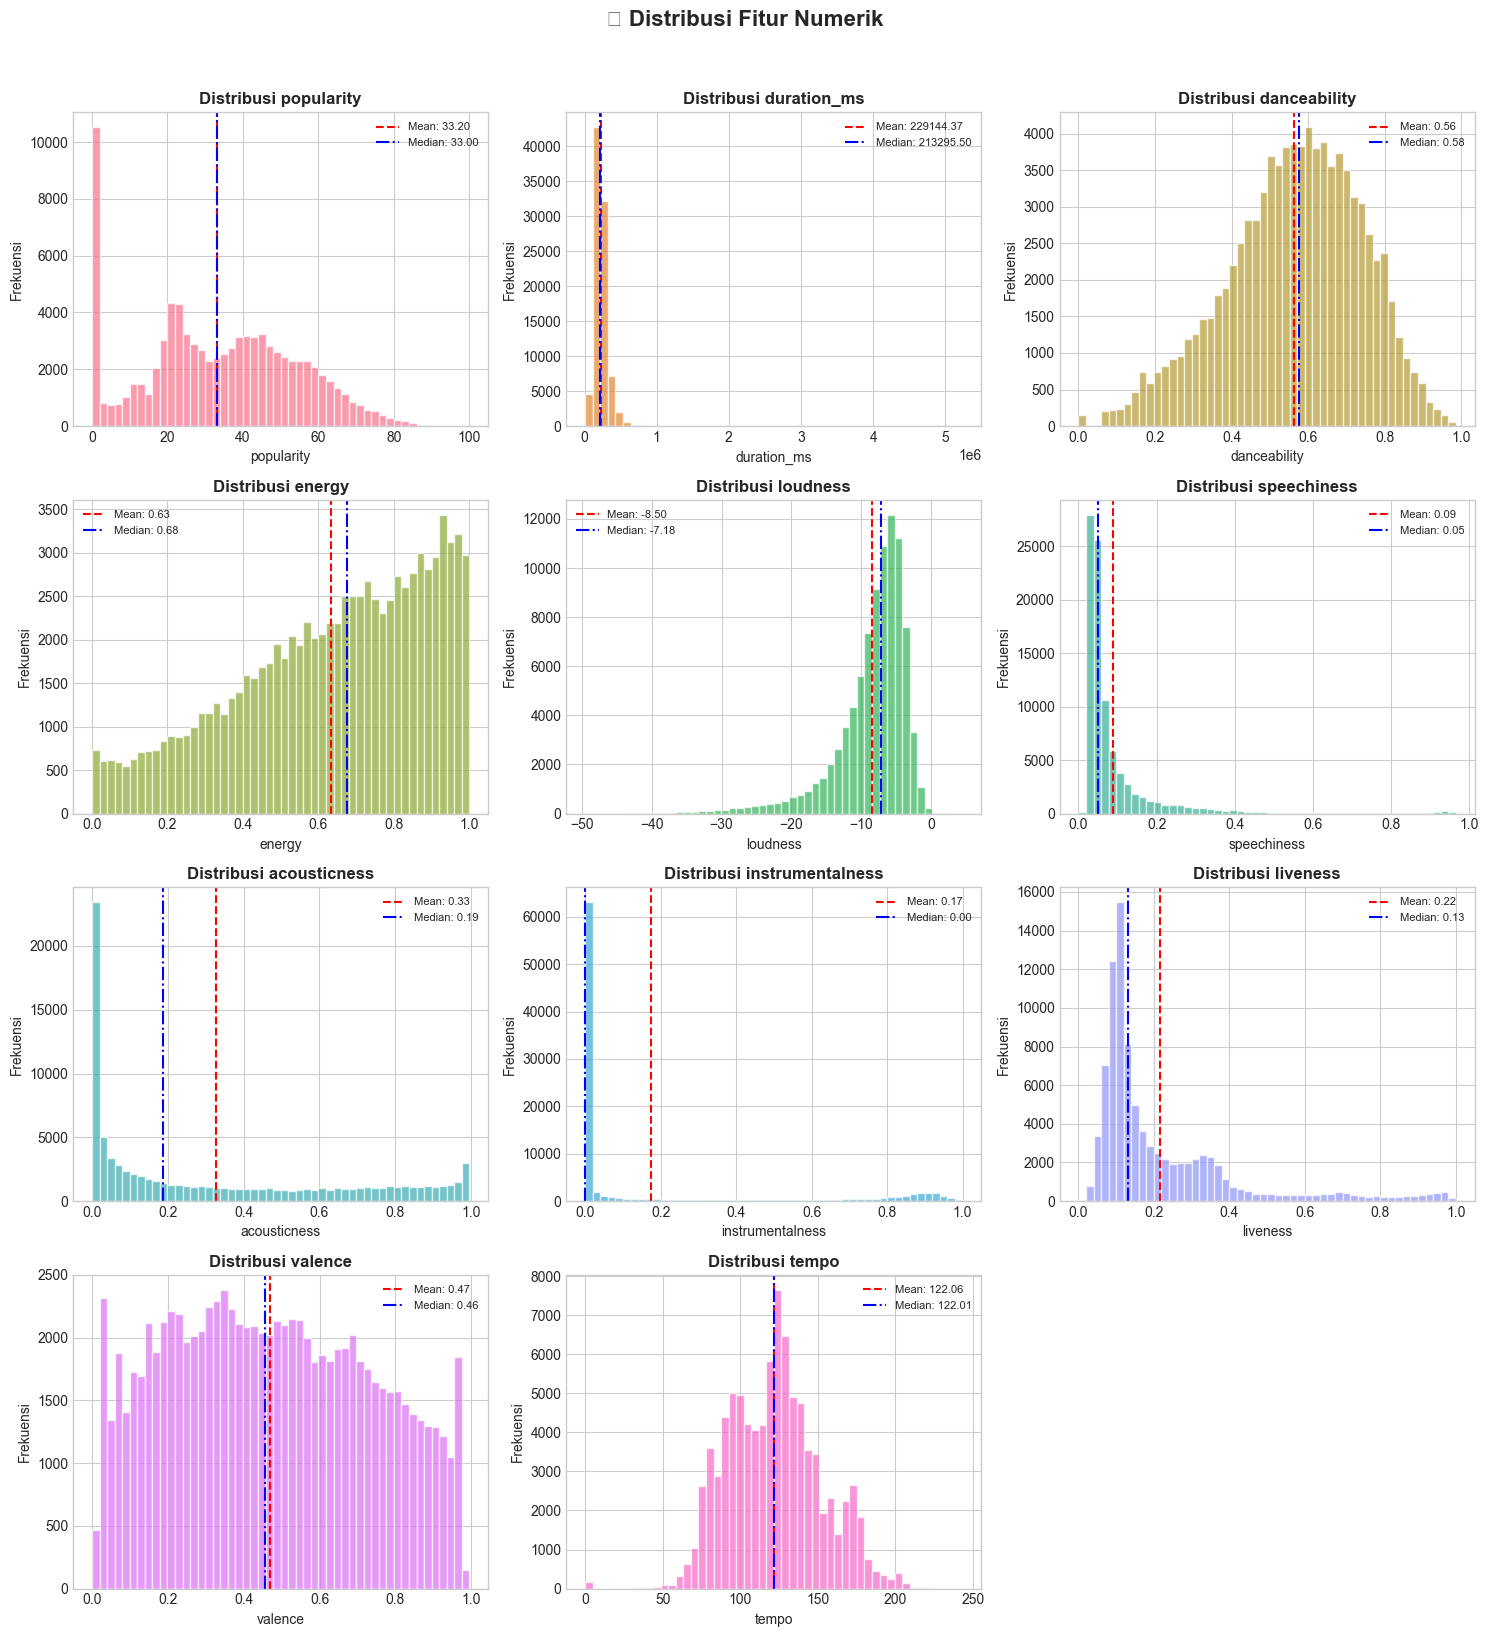


📝 INSIGHT:
- Garis MERAH = Mean (rata-rata)
- Garis BIRU = Median (nilai tengah)
- Jika Mean ≈ Median → Distribusi simetris
- Jika Mean > Median → Skewed ke kanan (data cenderung kecil)
- Jika Mean < Median → Skewed ke kiri (data cenderung besar)


In [9]:
# Definisikan kolom numerik untuk analisis
num_features = ['popularity', 'duration_ms', 'danceability', 'energy', 
                'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo']

# Visualisasi distribusi setiap fitur numerik dengan histogram
fig, axes = plt.subplots(4, 3, figsize=(15, 16))
axes = axes.flatten()

colors = sns.color_palette("husl", len(num_features))

for i, col in enumerate(num_features):
    ax = axes[i]
    ax.hist(df_aggregated[col], bins=50, color=colors[i], edgecolor='white', alpha=0.7)
    ax.set_title(f'Distribusi {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')
    
    # Tambahkan garis mean dan median
    mean_val = df_aggregated[col].mean()
    median_val = df_aggregated[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='blue', linestyle='-.', label=f'Median: {median_val:.2f}')
    ax.legend(fontsize=8)

# Hapus subplot kosong
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('📊 Distribusi Fitur Numerik', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📝 INSIGHT:")
print("- Garis MERAH = Mean (rata-rata)")
print("- Garis BIRU = Median (nilai tengah)")
print("- Jika Mean ≈ Median → Distribusi simetris")
print("- Jika Mean > Median → Skewed ke kanan (data cenderung kecil)")
print("- Jika Mean < Median → Skewed ke kiri (data cenderung besar)")

### 4.2 Deteksi Outlier dengan Box Plot

**Outlier** adalah data yang nilainya jauh berbeda dari data lainnya. Box plot membantu kita mendeteksi outlier.

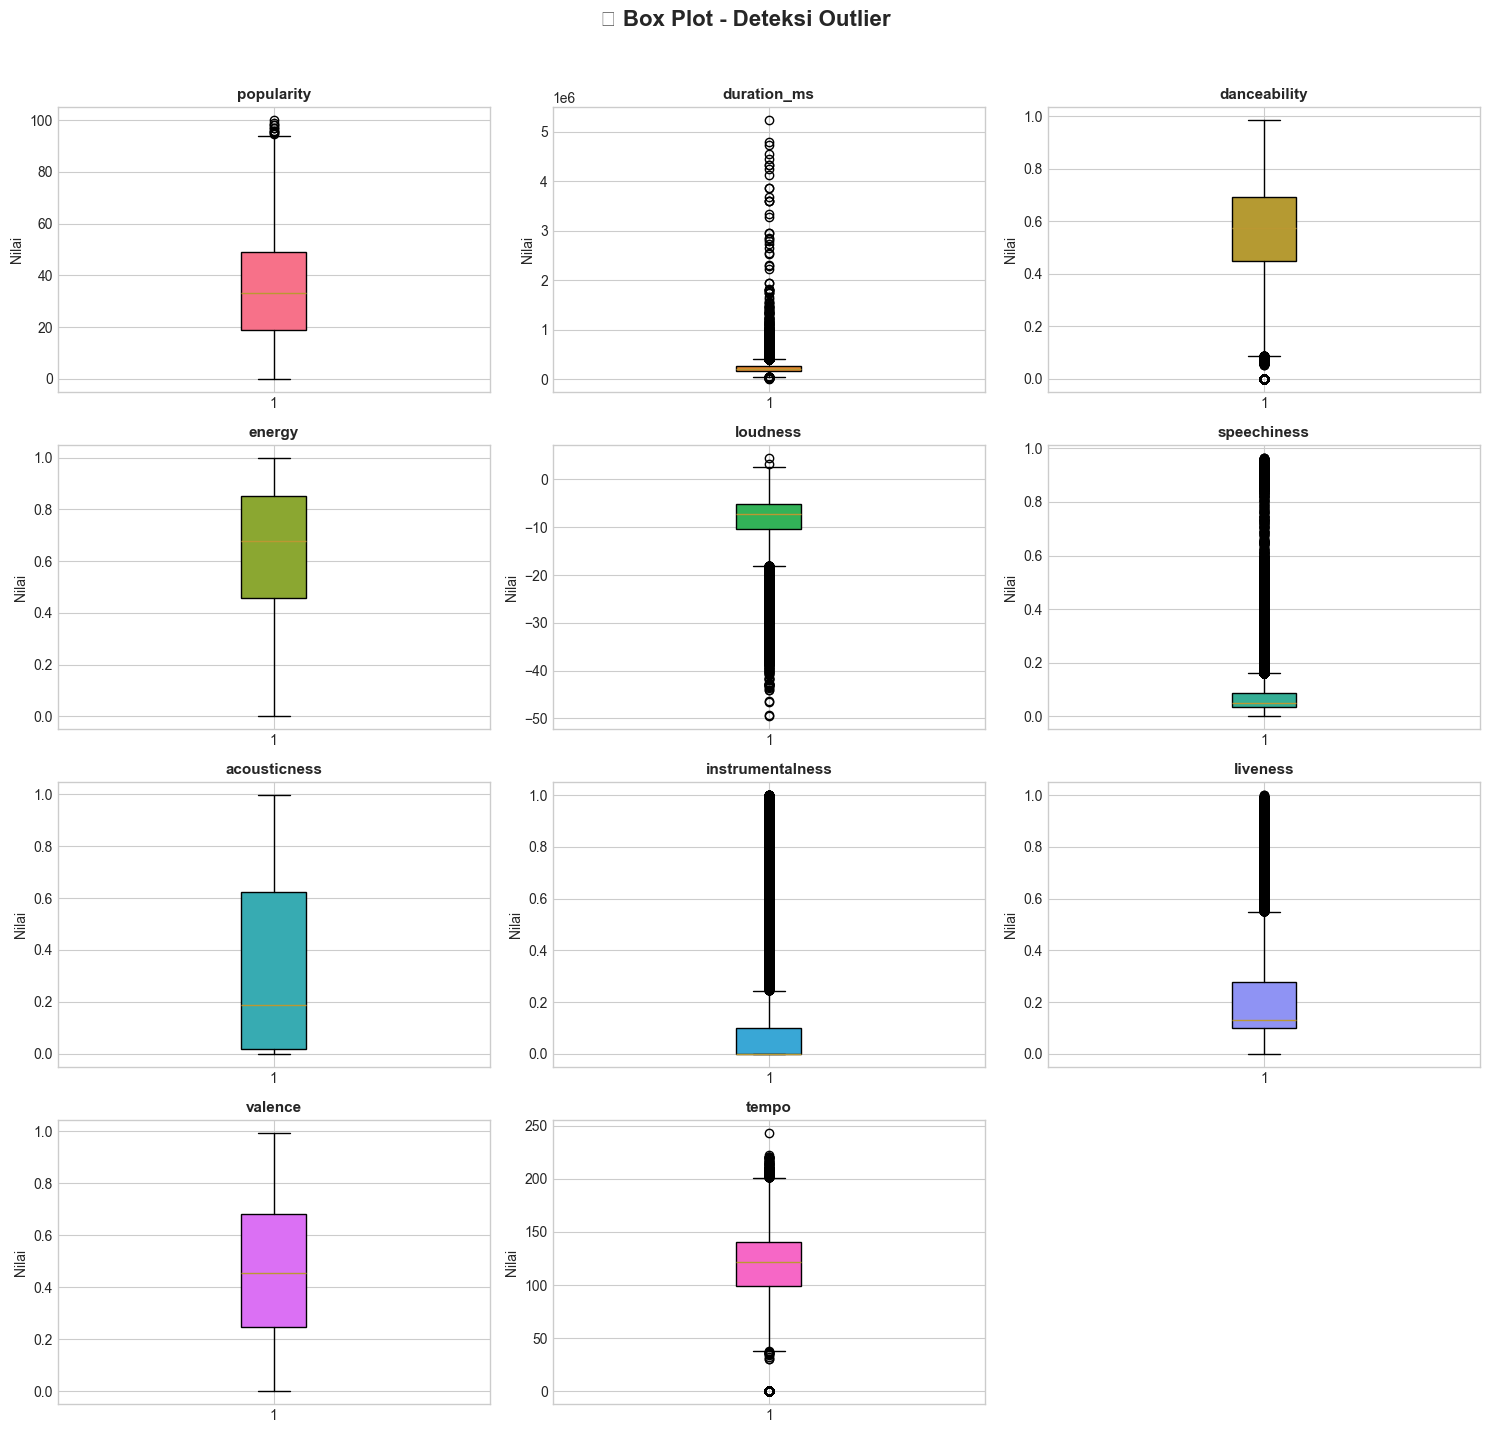


📝 CARA MEMBACA BOX PLOT:
┌─────────────────────────────────────────────────────────────┐
│  ●  Titik di luar whisker = OUTLIER                        │
│  ─── Garis horizontal dalam box = MEDIAN                   │
│  █████ Kotak = Q1 (25%) hingga Q3 (75%) → IQR              │
│  ─── Whisker = Rentang normal (1.5 × IQR)                  │
└─────────────────────────────────────────────────────────────┘


In [10]:
# Box Plot untuk mendeteksi outlier
fig, axes = plt.subplots(4, 3, figsize=(15, 14))
axes = axes.flatten()

for i, col in enumerate(num_features):
    ax = axes[i]
    box_data = ax.boxplot(df_aggregated[col].dropna(), patch_artist=True)
    box_data['boxes'][0].set_facecolor(colors[i])
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_ylabel('Nilai')

# Hapus subplot kosong
for j in range(len(num_features), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('📦 Box Plot - Deteksi Outlier', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📝 CARA MEMBACA BOX PLOT:")
print("┌─────────────────────────────────────────────────────────────┐")
print("│  ●  Titik di luar whisker = OUTLIER                        │")
print("│  ─── Garis horizontal dalam box = MEDIAN                   │")
print("│  █████ Kotak = Q1 (25%) hingga Q3 (75%) → IQR              │")
print("│  ─── Whisker = Rentang normal (1.5 × IQR)                  │")
print("└─────────────────────────────────────────────────────────────┘")

### 4.3 Korelasi Antar Fitur

**Korelasi** mengukur hubungan antara dua variabel:
- **+1** = Korelasi positif sempurna (naik bersama)
- **0** = Tidak ada korelasi
- **-1** = Korelasi negatif sempurna (berbanding terbalik)

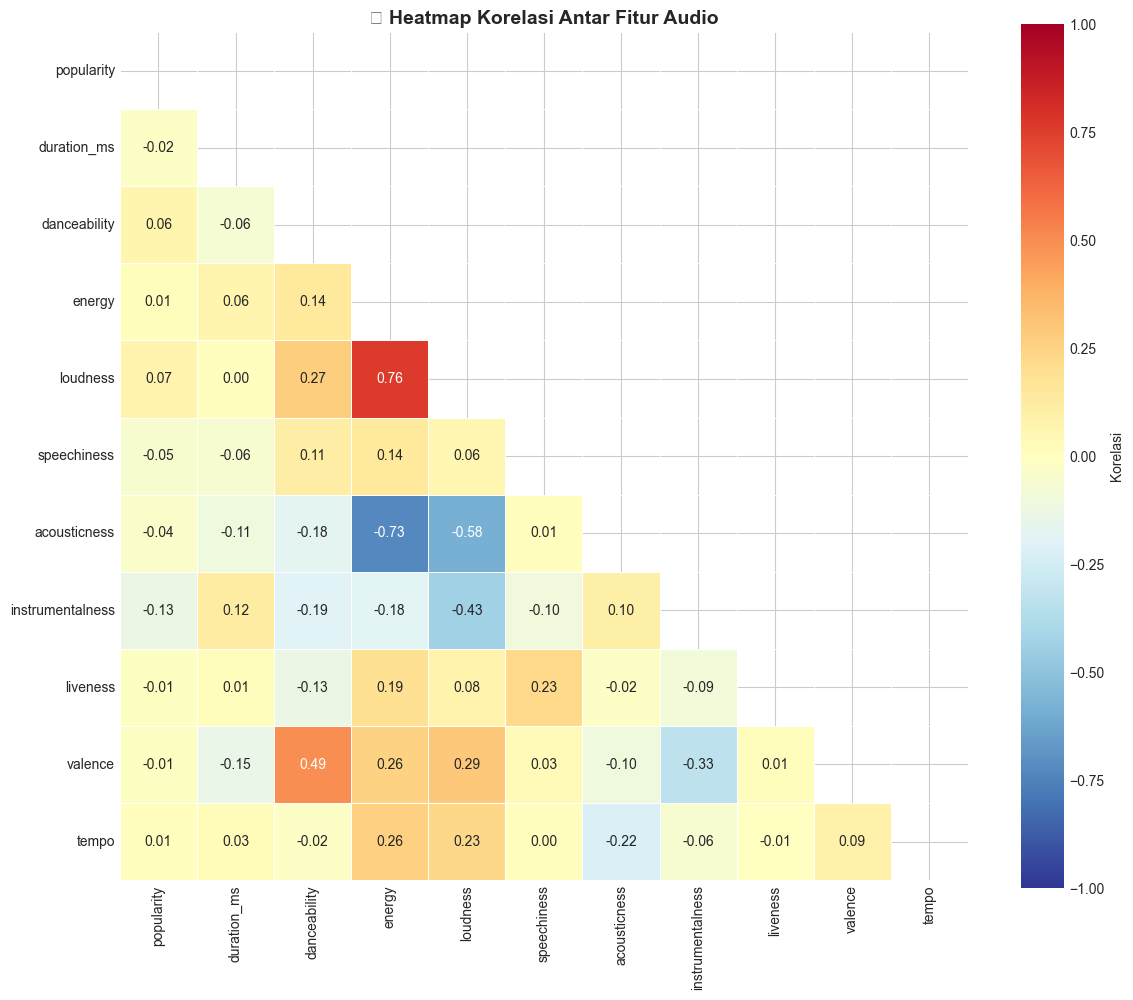


📊 KORELASI TERTINGGI (Positif):
--------------------------------------------------
     Fitur 1  Fitur 2  Korelasi
      energy loudness  0.758774
danceability  valence  0.492578
    loudness  valence  0.289095
danceability loudness  0.271838
      energy    tempo  0.258629

📊 KORELASI TERTINGGI (Negatif):
--------------------------------------------------
         Fitur 1          Fitur 2  Korelasi
    acousticness            tempo -0.220252
instrumentalness          valence -0.330756
        loudness instrumentalness -0.434719
        loudness     acousticness -0.582664
          energy     acousticness -0.732569


In [11]:
# Hitung korelasi antar fitur numerik
correlation_matrix = df_aggregated[num_features].corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 10))

# Buat mask untuk segitiga atas (supaya tidak redundant)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Buat heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdYlBu_r',  # Merah untuk positif, Biru untuk negatif
            vmin=-1, vmax=1,
            fmt='.2f',
            linewidths=0.5,
            square=True,
            cbar_kws={'label': 'Korelasi'})

plt.title('🔥 Heatmap Korelasi Antar Fitur Audio', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Temukan korelasi tertinggi
print("\n📊 KORELASI TERTINGGI (Positif):")
print("-" * 50)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_pairs.append({
            'Fitur 1': correlation_matrix.columns[i],
            'Fitur 2': correlation_matrix.columns[j],
            'Korelasi': correlation_matrix.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('Korelasi', ascending=False)
print(corr_df.head(5).to_string(index=False))

print("\n📊 KORELASI TERTINGGI (Negatif):")
print("-" * 50)
print(corr_df.tail(5).to_string(index=False))

### 4.4 Analisis Genre dan Popularitas

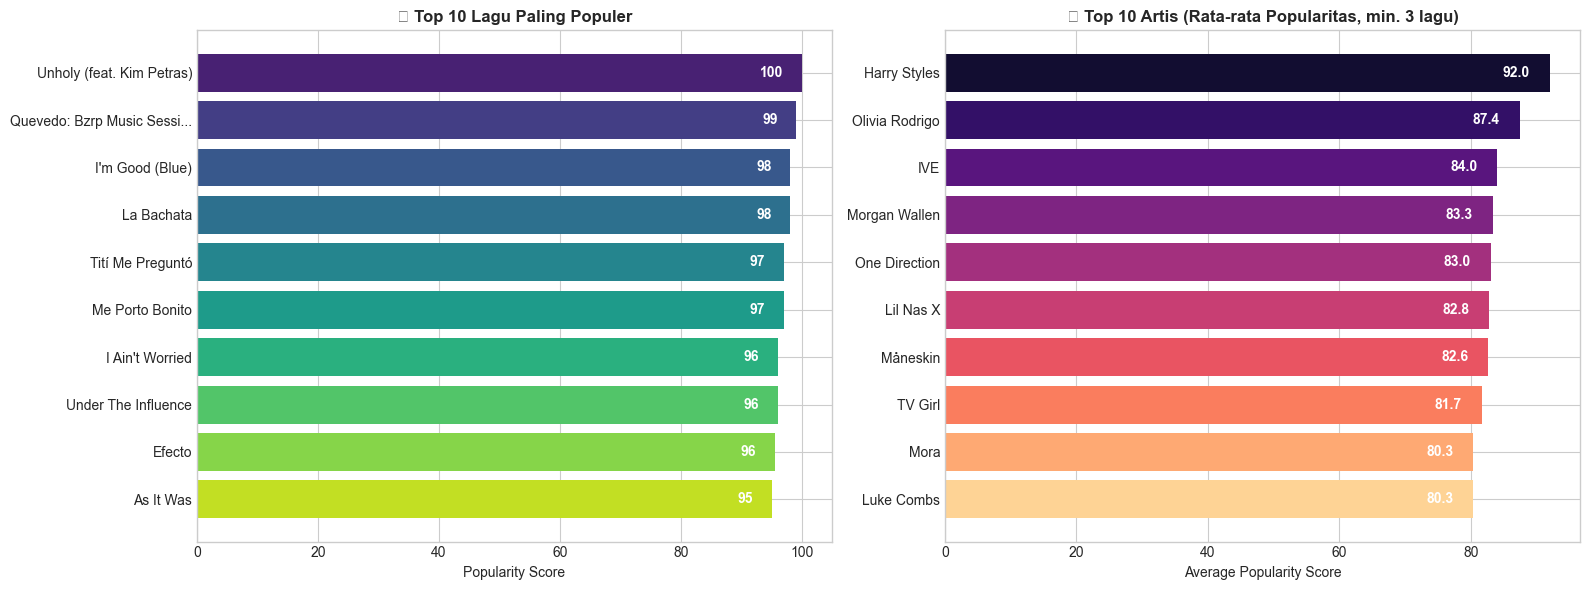

In [12]:
# Analisis Top 10 Lagu Paling Populer
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Lagu
top_songs = df_aggregated.nlargest(10, 'popularity')[['track_name', 'artists', 'popularity']]
ax1 = axes[0]
bars1 = ax1.barh(range(len(top_songs)), top_songs['popularity'], color=sns.color_palette("viridis", 10))
ax1.set_yticks(range(len(top_songs)))
ax1.set_yticklabels([f"{row['track_name'][:25]}..." if len(row['track_name']) > 25 else row['track_name'] 
                    for _, row in top_songs.iterrows()])
ax1.set_xlabel('Popularity Score')
ax1.set_title('🎵 Top 10 Lagu Paling Populer', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

# Tambahkan nilai di dalam bar
for bar, val in zip(bars1, top_songs['popularity']):
    ax1.text(val - 3, bar.get_y() + bar.get_height()/2, f'{val:.0f}', 
             va='center', ha='right', color='white', fontweight='bold')

# Top 10 Artis berdasarkan rata-rata popularitas
# Pecah artis yang ada tanda ;
artists_data = df_aggregated[['artists', 'popularity']].copy()
artists_data['artists'] = artists_data['artists'].str.split(';')
artists_exploded = artists_data.explode('artists')
artists_exploded['artists'] = artists_exploded['artists'].str.strip()

# Hitung rata-rata popularitas per artis (minimal 3 lagu)
artist_counts = artists_exploded.groupby('artists').agg({'popularity': ['mean', 'count']})
artist_counts.columns = ['avg_popularity', 'song_count']
artist_counts = artist_counts[artist_counts['song_count'] >= 3].sort_values('avg_popularity', ascending=False).head(10)

ax2 = axes[1]
bars2 = ax2.barh(range(len(artist_counts)), artist_counts['avg_popularity'], color=sns.color_palette("magma", 10))
ax2.set_yticks(range(len(artist_counts)))
ax2.set_yticklabels(artist_counts.index)
ax2.set_xlabel('Average Popularity Score')
ax2.set_title('🎤 Top 10 Artis (Rata-rata Popularitas, min. 3 lagu)', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

for bar, val in zip(bars2, artist_counts['avg_popularity']):
    ax2.text(val - 3, bar.get_y() + bar.get_height()/2, f'{val:.1f}', 
             va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

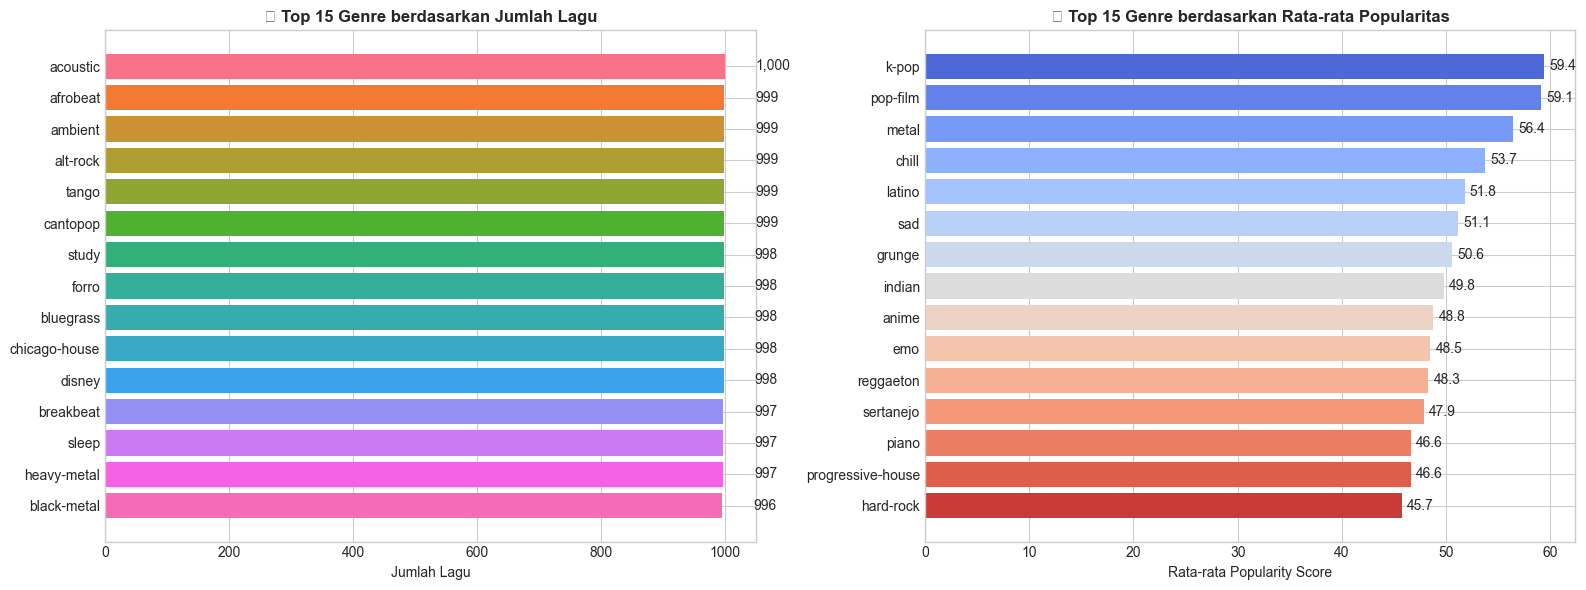

In [13]:
# Analisis distribusi Genre
# Ambil genre pertama dari setiap lagu (jika ada multiple genre)
df_aggregated['primary_genre'] = df_aggregated['track_genre'].apply(lambda x: x.split(',')[0].strip())

# Top 15 Genre berdasarkan jumlah lagu
genre_counts = df_aggregated['primary_genre'].value_counts().head(15)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart genre
ax1 = axes[0]
colors_genre = sns.color_palette("husl", len(genre_counts))
bars = ax1.barh(range(len(genre_counts)), genre_counts.values, color=colors_genre)
ax1.set_yticks(range(len(genre_counts)))
ax1.set_yticklabels(genre_counts.index)
ax1.set_xlabel('Jumlah Lagu')
ax1.set_title('🎸 Top 15 Genre berdasarkan Jumlah Lagu', fontsize=12, fontweight='bold')
ax1.invert_yaxis()

for bar, val in zip(bars, genre_counts.values):
    ax1.text(val + 50, bar.get_y() + bar.get_height()/2, f'{val:,}', va='center')

# Popularitas rata-rata per genre
genre_popularity = df_aggregated.groupby('primary_genre')['popularity'].mean().sort_values(ascending=False).head(15)

ax2 = axes[1]
colors_pop = sns.color_palette("coolwarm", len(genre_popularity))
bars2 = ax2.barh(range(len(genre_popularity)), genre_popularity.values, color=colors_pop)
ax2.set_yticks(range(len(genre_popularity)))
ax2.set_yticklabels(genre_popularity.index)
ax2.set_xlabel('Rata-rata Popularity Score')
ax2.set_title('📈 Top 15 Genre berdasarkan Rata-rata Popularitas', fontsize=12, fontweight='bold')
ax2.invert_yaxis()

for bar, val in zip(bars2, genre_popularity.values):
    ax2.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}', va='center')

plt.tight_layout()
plt.show()

### 4.5 Visualisasi Interaktif - Karakteristik Audio per Genre

In [14]:
# Radar Chart untuk membandingkan karakteristik audio beberapa genre
audio_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence']

# Pilih 5 genre teratas untuk perbandingan
top_genres = genre_counts.head(5).index.tolist()

# Hitung rata-rata fitur per genre
genre_audio_stats = df_aggregated[df_aggregated['primary_genre'].isin(top_genres)].groupby('primary_genre')[audio_features].mean()

# Buat radar chart
fig = go.Figure()

colors_radar = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']

for i, genre in enumerate(top_genres):
    values = genre_audio_stats.loc[genre].values.tolist()
    values += values[:1]  # Tutup polygon
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=audio_features + [audio_features[0]],
        fill='toself',
        name=genre.title(),
        line_color=colors_radar[i],
        opacity=0.7
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title={
        'text': '🎵 Perbandingan Karakteristik Audio - Top 5 Genre',
        'font': {'size': 16}
    },
    width=700,
    height=600
)

fig.show()

print("\n📝 INSIGHT:")
print("- Radar chart menunjukkan 'profil audio' dari setiap genre")
print("- Semakin ke luar = nilai semakin tinggi")
print("- Setiap genre punya karakteristik audio yang berbeda!")


📝 INSIGHT:
- Radar chart menunjukkan 'profil audio' dari setiap genre
- Semakin ke luar = nilai semakin tinggi
- Setiap genre punya karakteristik audio yang berbeda!


---
## ⚙️ Bagian 5: Data Preprocessing untuk Clustering

Sebelum melakukan clustering, kita perlu menyiapkan data:

### Mengapa Preprocessing Penting?
1. **Normalisasi/Scaling**: Semua fitur harus dalam skala yang sama, agar fitur dengan nilai besar tidak mendominasi
2. **Pemilihan Fitur**: Hanya gunakan fitur yang relevan untuk clustering
3. **Menangani Multikolinearitas**: Menghindari fitur yang sangat berkorelasi

### Fitur yang Akan Digunakan untuk Clustering
Kita akan menggunakan **fitur audio** yang menggambarkan karakteristik musik:

In [15]:
# ============================================================
# 5.1 PEMILIHAN FITUR UNTUK CLUSTERING
# ============================================================

# Fitur audio yang akan digunakan untuk clustering
# Kita tidak menggunakan 'loudness' karena sangat berkorelasi dengan 'energy'
clustering_features = [
    'danceability',      # Seberapa cocok untuk menari
    'energy',            # Seberapa energik
    'speechiness',       # Keberadaan kata-kata
    'acousticness',      # Seberapa akustik
    'instrumentalness',  # Seberapa instrumental
    'liveness',          # Apakah live performance
    'valence',           # Positivitas/mood
    'tempo'              # Kecepatan (BPM)
]

print("🎯 FITUR YANG DIPILIH UNTUK CLUSTERING:")
print("-" * 50)
for i, feat in enumerate(clustering_features, 1):
    print(f"   {i}. {feat}")

# Buat dataframe untuk clustering
df_cluster = df_aggregated[['track_id', 'track_name', 'artists', 'primary_genre'] + clustering_features].copy()

print(f"\n📏 Jumlah data untuk clustering: {len(df_cluster):,}")
print(f"📏 Jumlah fitur: {len(clustering_features)}")

df_cluster.head()

🎯 FITUR YANG DIPILIH UNTUK CLUSTERING:
--------------------------------------------------
   1. danceability
   2. energy
   3. speechiness
   4. acousticness
   5. instrumentalness
   6. liveness
   7. valence
   8. tempo

📏 Jumlah data untuk clustering: 89,740
📏 Jumlah fitur: 8


,track_id,track_name,artists,primary_genre,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0000vdREvCVMxbQTkS888c,Lolly,Rill,german,0.910,0.374,0.1990,0.075700,0.00301,0.1540,0.432,104.042
1,000CC8EParg64OmTxVnZ0p,It's All Coming Back To Me Now (Glee Cast Vers...,Glee Cast,club,0.269,0.516,0.0366,0.406000,0.00000,0.1170,0.341,178.174
2,000Iz0K615UepwSJ5z2RE5,Böxig Leise - Pig & Dan Remix,Paul Kalkbrenner;Pig&Dan,minimal-techno,0.686,0.560,0.0462,0.001140,0.18100,0.1110,0.108,119.997
3,000RDCYioLteXcutOjeweY,Teeje Week,Jordan Sandhu,hip-hop,0.679,0.770,0.1900,0.058300,0.00000,0.0825,0.839,161.721
4,000qpdoc97IMTBvF8gwcpy,Tief,Paul Kalkbrenner,minimal-techno,0.519,0.431,0.0291,0.000964,0.72000,0.0916,0.234,129.971


In [16]:
# ============================================================
# 5.2 NORMALISASI DATA (FEATURE SCALING)
# ============================================================

print("📊 SEBELUM NORMALISASI:")
print("-" * 50)
print(df_cluster[clustering_features].describe().round(3))

# Ambil hanya fitur numerik untuk scaling
X = df_cluster[clustering_features].values

# Gunakan StandardScaler (z-score normalization)
# Mengubah data sehingga mean=0 dan std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat dataframe hasil scaling untuk pengecekan
df_scaled = pd.DataFrame(X_scaled, columns=clustering_features)

print("\n📊 SETELAH NORMALISASI (StandardScaler):")
print("-" * 50)
print(df_scaled.describe().round(3))

print("\n✅ Data berhasil dinormalisasi!")
print("📝 Sekarang semua fitur memiliki mean ≈ 0 dan std ≈ 1")

📊 SEBELUM NORMALISASI:
--------------------------------------------------
       danceability     energy  speechiness  acousticness  instrumentalness  \
count     89740.000  89740.000    89740.000     89740.000         89740.000   
mean          0.562      0.634        0.087         0.328             0.173   
std           0.177      0.257        0.113         0.338             0.324   
min           0.000      0.000        0.000         0.000             0.000   
25%           0.450      0.457        0.036         0.017             0.000   
50%           0.576      0.676        0.049         0.188             0.000   
75%           0.692      0.853        0.086         0.625             0.098   
max           0.985      1.000        0.965         0.996             1.000   

        liveness    valence      tempo  
count  89740.000  89740.000  89740.000  
mean       0.217      0.469    122.058  
std        0.195      0.263     30.118  
min        0.000      0.000      0.000  
25%      

---
## 🤖 Bagian 6: K-Means Clustering

### Apa itu K-Means?
**K-Means** adalah algoritma clustering yang paling populer. Cara kerjanya:

1. **Tentukan jumlah cluster (K)** yang diinginkan
2. **Inisialisasi K titik pusat (centroid)** secara random
3. **Assign setiap data** ke centroid terdekat
4. **Hitung ulang centroid** berdasarkan rata-rata anggota cluster
5. **Ulangi langkah 3-4** sampai centroid tidak berubah

### Bagaimana Menentukan Jumlah Cluster Optimal?
Ada beberapa metode:
1. **Elbow Method** - Cari "siku" pada grafik inertia
2. **Silhouette Score** - Ukur seberapa baik pemisahan cluster

In [17]:
# ============================================================
# 6.1 MENENTUKAN JUMLAH CLUSTER OPTIMAL
# ============================================================

# Range jumlah cluster yang akan diuji
K_range = range(2, 11)

# List untuk menyimpan metrik evaluasi
inertias = []           # Untuk Elbow Method
silhouette_scores = []  # Untuk Silhouette Score
calinski_scores = []    # Untuk Calinski-Harabasz Index
davies_scores = []      # Untuk Davies-Bouldin Index

print("🔄 Menghitung metrik untuk K=2 hingga K=10...")
print("-" * 50)

for k in K_range:
    # Latih model K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(X_scaled)
    
    # Hitung metrik
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    calinski_scores.append(calinski_harabasz_score(X_scaled, labels))
    davies_scores.append(davies_bouldin_score(X_scaled, labels))
    
    print(f"   K={k}: Silhouette={silhouette_scores[-1]:.4f}, Inertia={inertias[-1]:.2f}")

print("\n✅ Selesai!")

🔄 Menghitung metrik untuk K=2 hingga K=10...
--------------------------------------------------
   K=2: Silhouette=0.2229, Inertia=579376.92
   K=3: Silhouette=0.1760, Inertia=508806.64
   K=4: Silhouette=0.1842, Inertia=452224.68
   K=5: Silhouette=0.1964, Inertia=410375.46
   K=6: Silhouette=0.2003, Inertia=372536.86
   K=7: Silhouette=0.2070, Inertia=337987.39
   K=8: Silhouette=0.1903, Inertia=317177.06
   K=9: Silhouette=0.1956, Inertia=298393.98
   K=10: Silhouette=0.1822, Inertia=285010.07

✅ Selesai!


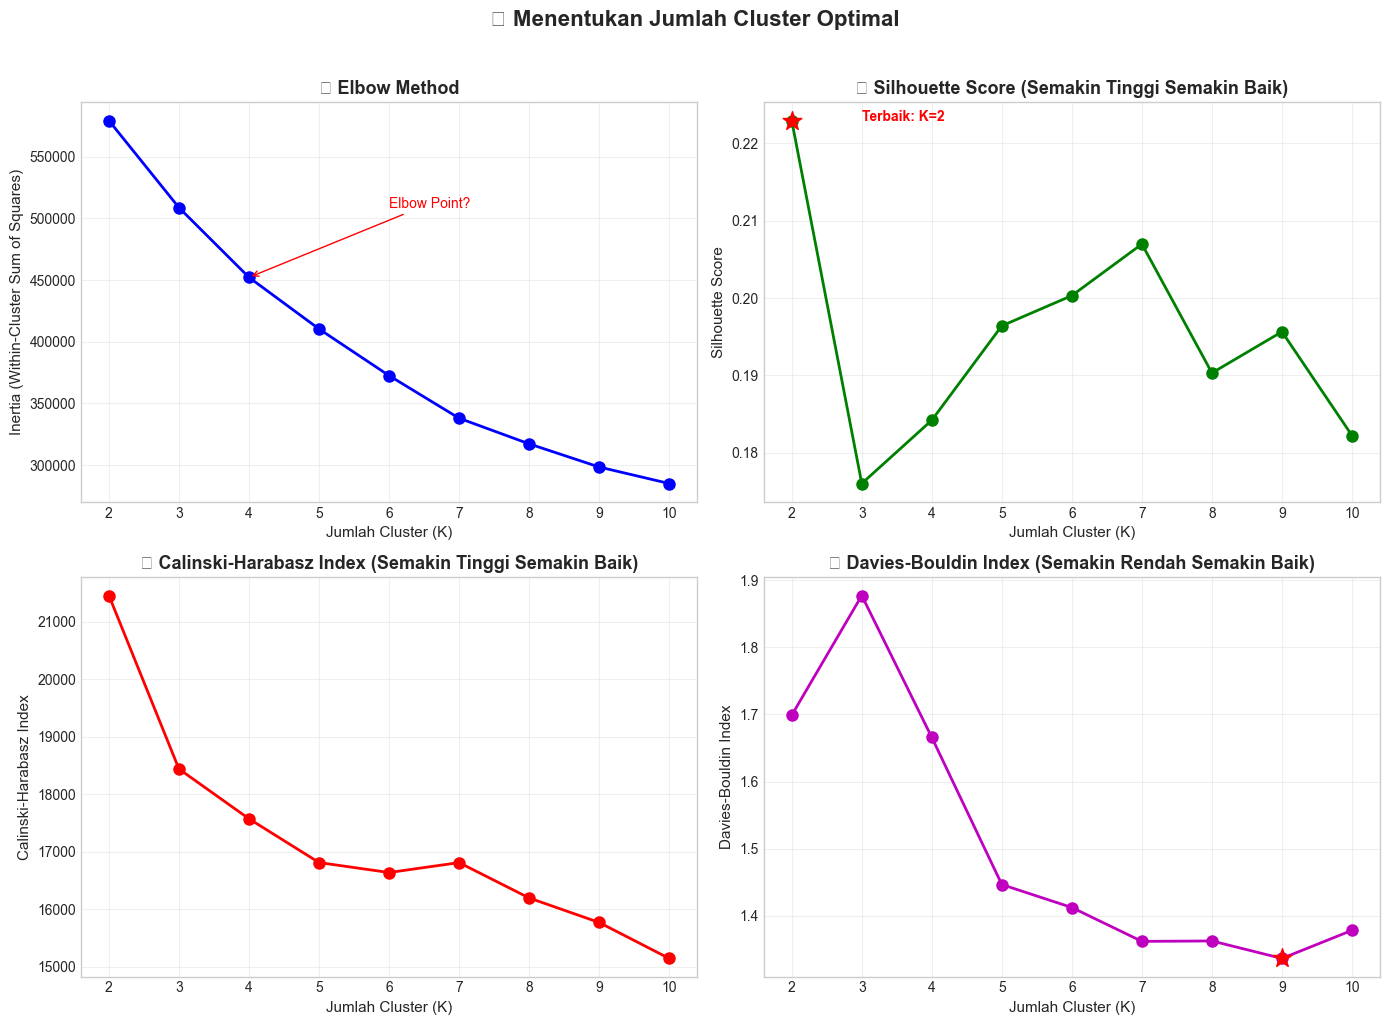


📊 RINGKASAN METRIK EVALUASI

🏆 Berdasarkan Silhouette Score tertinggi: K = 2
🏆 Berdasarkan Davies-Bouldin terendah: K = 9
🏆 Berdasarkan Calinski-Harabasz tertinggi: K = 2


In [18]:
# ============================================================
# 6.2 VISUALISASI METRIK EVALUASI
# ============================================================

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Elbow Method (Inertia)
ax1 = axes[0, 0]
ax1.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Jumlah Cluster (K)', fontsize=11)
ax1.set_ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=11)
ax1.set_title('📉 Elbow Method', fontsize=13, fontweight='bold')
ax1.set_xticks(K_range)
ax1.grid(True, alpha=0.3)

# Tambahkan anotasi untuk "elbow"
ax1.annotate('Elbow Point?', xy=(4, inertias[2]), xytext=(6, inertias[1]),
            arrowprops=dict(arrowstyle='->', color='red'),
            fontsize=10, color='red')

# 2. Silhouette Score (Higher is better)
ax2 = axes[0, 1]
ax2.plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
ax2.set_xlabel('Jumlah Cluster (K)', fontsize=11)
ax2.set_ylabel('Silhouette Score', fontsize=11)
ax2.set_title('📊 Silhouette Score (Semakin Tinggi Semakin Baik)', fontsize=13, fontweight='bold')
ax2.set_xticks(K_range)
ax2.grid(True, alpha=0.3)

# Highlight nilai maksimum
max_silhouette_idx = np.argmax(silhouette_scores)
ax2.scatter([list(K_range)[max_silhouette_idx]], [silhouette_scores[max_silhouette_idx]], 
           color='red', s=200, zorder=5, marker='*')
ax2.annotate(f'Terbaik: K={list(K_range)[max_silhouette_idx]}', 
            xy=(list(K_range)[max_silhouette_idx], silhouette_scores[max_silhouette_idx]),
            xytext=(list(K_range)[max_silhouette_idx]+1, silhouette_scores[max_silhouette_idx]),
            fontsize=10, color='red', fontweight='bold')

# 3. Calinski-Harabasz Index (Higher is better)
ax3 = axes[1, 0]
ax3.plot(K_range, calinski_scores, 'ro-', linewidth=2, markersize=8)
ax3.set_xlabel('Jumlah Cluster (K)', fontsize=11)
ax3.set_ylabel('Calinski-Harabasz Index', fontsize=11)
ax3.set_title('📈 Calinski-Harabasz Index (Semakin Tinggi Semakin Baik)', fontsize=13, fontweight='bold')
ax3.set_xticks(K_range)
ax3.grid(True, alpha=0.3)

# 4. Davies-Bouldin Index (Lower is better)
ax4 = axes[1, 1]
ax4.plot(K_range, davies_scores, 'mo-', linewidth=2, markersize=8)
ax4.set_xlabel('Jumlah Cluster (K)', fontsize=11)
ax4.set_ylabel('Davies-Bouldin Index', fontsize=11)
ax4.set_title('📉 Davies-Bouldin Index (Semakin Rendah Semakin Baik)', fontsize=13, fontweight='bold')
ax4.set_xticks(K_range)
ax4.grid(True, alpha=0.3)

# Highlight nilai minimum
min_davies_idx = np.argmin(davies_scores)
ax4.scatter([list(K_range)[min_davies_idx]], [davies_scores[min_davies_idx]], 
           color='red', s=200, zorder=5, marker='*')

plt.suptitle('🎯 Menentukan Jumlah Cluster Optimal', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Ringkasan
print("\n" + "="*60)
print("📊 RINGKASAN METRIK EVALUASI")
print("="*60)
print(f"\n🏆 Berdasarkan Silhouette Score tertinggi: K = {list(K_range)[max_silhouette_idx]}")
print(f"🏆 Berdasarkan Davies-Bouldin terendah: K = {list(K_range)[min_davies_idx]}")
print(f"🏆 Berdasarkan Calinski-Harabasz tertinggi: K = {list(K_range)[np.argmax(calinski_scores)]}")

### 📝 Interpretasi Metrik Evaluasi

| Metrik | Penjelasan | Nilai Optimal |
|--------|------------|---------------|
| **Inertia (Elbow)** | Total jarak kuadrat dari data ke centroid cluster-nya | Cari titik "siku" dimana penurunan melambat |
| **Silhouette Score** | Mengukur seberapa mirip data dengan cluster sendiri vs cluster lain (-1 hingga 1) | **Semakin tinggi semakin baik** (mendekati 1) |
| **Calinski-Harabasz** | Rasio antara dispersi antar-cluster vs dalam-cluster | **Semakin tinggi semakin baik** |
| **Davies-Bouldin** | Rata-rata kemiripan antar cluster | **Semakin rendah semakin baik** (mendekati 0) |

In [19]:
# ============================================================
# 6.3 TRAINING MODEL DENGAN K OPTIMAL
# ============================================================

# Berdasarkan analisis metrik, kita pilih K yang optimal
# Umumnya kita memilih nilai yang memberikan keseimbangan terbaik
optimal_k = 4  # Anda bisa mengubah ini berdasarkan hasil analisis

print(f"🎯 Jumlah Cluster yang Dipilih: K = {optimal_k}")
print("="*60)

# Latih model K-Means dengan K optimal
kmeans_final = KMeans(
    n_clusters=optimal_k, 
    random_state=42, 
    n_init=10,          # Jumlah inisialisasi berbeda
    max_iter=300,       # Iterasi maksimum
    algorithm='lloyd'   # Algoritma klasik K-Means
)

# Fit dan prediksi cluster
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Tambahkan label cluster ke dataframe
df_cluster['cluster'] = cluster_labels

# Tampilkan informasi
print(f"\n📊 Distribusi Data per Cluster:")
print("-" * 40)
for i in range(optimal_k):
    count = (cluster_labels == i).sum()
    percentage = count / len(cluster_labels) * 100
    print(f"   Cluster {i}: {count:,} lagu ({percentage:.1f}%)")

print(f"\n✅ Model K-Means berhasil dilatih!")
print(f"📊 Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")

🎯 Jumlah Cluster yang Dipilih: K = 4

📊 Distribusi Data per Cluster:
----------------------------------------
   Cluster 0: 26,586 lagu (29.6%)
   Cluster 1: 7,136 lagu (8.0%)
   Cluster 2: 20,535 lagu (22.9%)
   Cluster 3: 35,483 lagu (39.5%)

✅ Model K-Means berhasil dilatih!
📊 Silhouette Score: 0.1842


---
## 📈 Bagian 7: Visualisasi Hasil Clustering

Untuk memvisualisasikan hasil clustering dalam ruang 2D, kita akan menggunakan **PCA (Principal Component Analysis)** untuk mereduksi dimensi data.

In [20]:
# ============================================================
# 7.1 REDUKSI DIMENSI DENGAN PCA
# ============================================================

# PCA untuk mereduksi dari 8 dimensi ke 2 dimensi (untuk visualisasi)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Informasi tentang variance yang dipertahankan
print("📊 INFORMASI PCA:")
print("-" * 50)
print(f"   Variance PC1: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"   Variance PC2: {pca.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total Variance: {sum(pca.explained_variance_ratio_)*100:.2f}%")

# Tambahkan koordinat PCA ke dataframe
df_cluster['PC1'] = X_pca[:, 0]
df_cluster['PC2'] = X_pca[:, 1]

# Dapatkan centroid dalam ruang PCA
centroids_pca = pca.transform(kmeans_final.cluster_centers_)

print("\n✅ PCA berhasil diterapkan!")

📊 INFORMASI PCA:
--------------------------------------------------
   Variance PC1: 27.75%
   Variance PC2: 17.69%
   Total Variance: 45.45%

✅ PCA berhasil diterapkan!


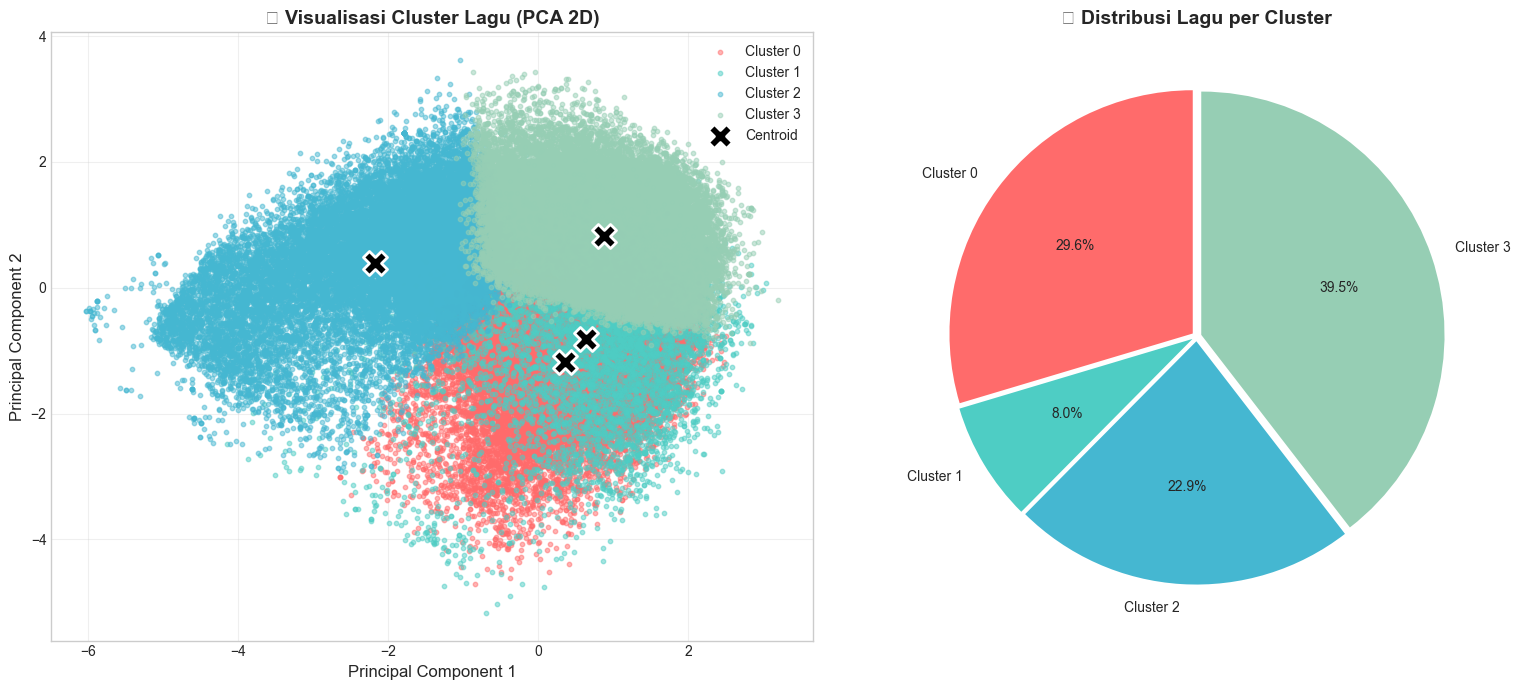

In [21]:
# ============================================================
# 7.2 VISUALISASI CLUSTER 2D (SCATTER PLOT)
# ============================================================

# Buat visualisasi cluster
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Warna untuk setiap cluster
cluster_colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F']

# Plot 1: Scatter plot dengan centroid
ax1 = axes[0]
for i in range(optimal_k):
    mask = df_cluster['cluster'] == i
    ax1.scatter(df_cluster.loc[mask, 'PC1'], df_cluster.loc[mask, 'PC2'], 
               c=cluster_colors[i], label=f'Cluster {i}', alpha=0.5, s=10)

# Plot centroid
ax1.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
           c='black', marker='X', s=300, edgecolors='white', linewidths=2,
           label='Centroid', zorder=5)

ax1.set_xlabel('Principal Component 1', fontsize=12)
ax1.set_ylabel('Principal Component 2', fontsize=12)
ax1.set_title('🎵 Visualisasi Cluster Lagu (PCA 2D)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Pie chart distribusi cluster
ax2 = axes[1]
cluster_counts = df_cluster['cluster'].value_counts().sort_index()
wedges, texts, autotexts = ax2.pie(cluster_counts.values, 
                                    labels=[f'Cluster {i}' for i in cluster_counts.index],
                                    colors=[cluster_colors[i] for i in cluster_counts.index],
                                    autopct='%1.1f%%',
                                    explode=[0.02]*optimal_k,
                                    startangle=90)

ax2.set_title('📊 Distribusi Lagu per Cluster', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
# ============================================================
# 7.3 VISUALISASI INTERAKTIF DENGAN PLOTLY
# ============================================================

# Sample data untuk visualisasi interaktif (karena data terlalu banyak)
sample_size = min(5000, len(df_cluster))
df_sample = df_cluster.sample(n=sample_size, random_state=42)

# Buat scatter plot interaktif
fig = px.scatter(
    df_sample, 
    x='PC1', 
    y='PC2', 
    color='cluster',
    hover_data=['track_name', 'artists', 'primary_genre', 'danceability', 'energy', 'valence'],
    title='🎵 Visualisasi Interaktif Cluster Lagu (Hover untuk Detail)',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'cluster': 'Cluster'},
    color_discrete_sequence=cluster_colors[:optimal_k],
    opacity=0.7
)

# Tambahkan centroid
fig.add_scatter(
    x=centroids_pca[:, 0], 
    y=centroids_pca[:, 1],
    mode='markers',
    marker=dict(symbol='x', size=15, color='black', line=dict(width=2)),
    name='Centroid',
    hovertemplate='Centroid Cluster %{text}<extra></extra>',
    text=[str(i) for i in range(optimal_k)]
)

fig.update_layout(
    width=900,
    height=600,
    legend_title_text='Cluster',
    font=dict(size=12)
)

fig.show()

print("💡 TIP: Arahkan mouse ke titik untuk melihat detail lagu!")

💡 TIP: Arahkan mouse ke titik untuk melihat detail lagu!


---
## 🔬 Bagian 8: Analisis dan Interpretasi Cluster

Sekarang saatnya memahami **karakteristik dari setiap cluster**. Apa yang membuat lagu-lagu dalam satu cluster mirip satu sama lain?

In [23]:
# ============================================================
# 8.1 STATISTIK RATA-RATA SETIAP CLUSTER
# ============================================================

# Hitung statistik rata-rata per cluster
cluster_stats = df_cluster.groupby('cluster')[clustering_features].mean()

print("📊 RATA-RATA FITUR AUDIO PER CLUSTER:")
print("="*80)
print(cluster_stats.round(3).to_string())

# Tampilkan dalam format yang lebih visual
print("\n" + "="*80)
print("🎯 RINGKASAN KARAKTERISTIK CLUSTER:")
print("="*80)

for cluster_id in range(optimal_k):
    stats = cluster_stats.loc[cluster_id]
    count = (df_cluster['cluster'] == cluster_id).sum()
    
    print(f"\n🎵 CLUSTER {cluster_id} ({count:,} lagu)")
    print("-" * 40)
    
    # Tentukan karakteristik utama
    characteristics = []
    
    if stats['danceability'] > 0.65:
        characteristics.append("💃 Sangat cocok untuk menari")
    elif stats['danceability'] < 0.45:
        characteristics.append("🪑 Kurang cocok untuk menari")
        
    if stats['energy'] > 0.7:
        characteristics.append("⚡ Sangat energik")
    elif stats['energy'] < 0.4:
        characteristics.append("😌 Tenang/Relaks")
        
    if stats['acousticness'] > 0.6:
        characteristics.append("🎸 Bersifat akustik")
    elif stats['acousticness'] < 0.2:
        characteristics.append("🎹 Banyak elemen elektronik")
        
    if stats['speechiness'] > 0.3:
        characteristics.append("🎤 Banyak lirik/kata-kata")
    elif stats['speechiness'] < 0.05:
        characteristics.append("🎶 Minim kata-kata")
        
    if stats['instrumentalness'] > 0.5:
        characteristics.append("🎻 Bersifat instrumental")
        
    if stats['valence'] > 0.6:
        characteristics.append("😊 Mood positif/ceria")
    elif stats['valence'] < 0.35:
        characteristics.append("😔 Mood sedih/melankolis")
        
    if stats['tempo'] > 130:
        characteristics.append("🏃 Tempo cepat")
    elif stats['tempo'] < 100:
        characteristics.append("🚶 Tempo lambat")
    
    for char in characteristics:
        print(f"   {char}")

📊 RATA-RATA FITUR AUDIO PER CLUSTER:
         danceability  energy  speechiness  acousticness  instrumentalness  liveness  valence    tempo
cluster                                                                                               
0               0.486   0.800        0.079         0.069             0.249     0.194    0.317  135.976
1               0.524   0.737        0.208         0.373             0.079     0.742    0.488  119.796
2               0.453   0.287        0.050         0.775             0.312     0.155    0.293  109.063
3               0.690   0.691        0.091         0.255             0.055     0.164    0.682  119.605

🎯 RINGKASAN KARAKTERISTIK CLUSTER:

🎵 CLUSTER 0 (26,586 lagu)
----------------------------------------
   ⚡ Sangat energik
   🎹 Banyak elemen elektronik
   😔 Mood sedih/melankolis
   🏃 Tempo cepat

🎵 CLUSTER 1 (7,136 lagu)
----------------------------------------
   ⚡ Sangat energik

🎵 CLUSTER 2 (20,535 lagu)
---------------------------------

In [24]:
# ============================================================
# 8.2 VISUALISASI RADAR CHART PER CLUSTER
# ============================================================

# Normalisasi statistik untuk radar chart (0-1 scale untuk semua fitur)
cluster_stats_normalized = cluster_stats.copy()
cluster_stats_normalized['tempo'] = (cluster_stats_normalized['tempo'] - cluster_stats_normalized['tempo'].min()) / \
                                     (cluster_stats_normalized['tempo'].max() - cluster_stats_normalized['tempo'].min())

# Fitur untuk radar chart (tanpa tempo karena sudah dinormalisasi)
radar_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                  'instrumentalness', 'liveness', 'valence']

fig = go.Figure()

for cluster_id in range(optimal_k):
    values = cluster_stats.loc[cluster_id, radar_features].values.tolist()
    values += values[:1]  # Tutup polygon
    
    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=radar_features + [radar_features[0]],
        fill='toself',
        name=f'Cluster {cluster_id}',
        line_color=cluster_colors[cluster_id],
        opacity=0.7
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    showlegend=True,
    title={
        'text': '🎵 Profil Audio Setiap Cluster',
        'font': {'size': 16}
    },
    width=800,
    height=600
)

fig.show()

print("\n📝 CARA MEMBACA RADAR CHART:")
print("- Setiap sumbu mewakili satu fitur audio")
print("- Semakin ke luar = nilai semakin tinggi")
print("- Bentuk yang berbeda = karakteristik cluster yang berbeda")


📝 CARA MEMBACA RADAR CHART:
- Setiap sumbu mewakili satu fitur audio
- Semakin ke luar = nilai semakin tinggi
- Bentuk yang berbeda = karakteristik cluster yang berbeda


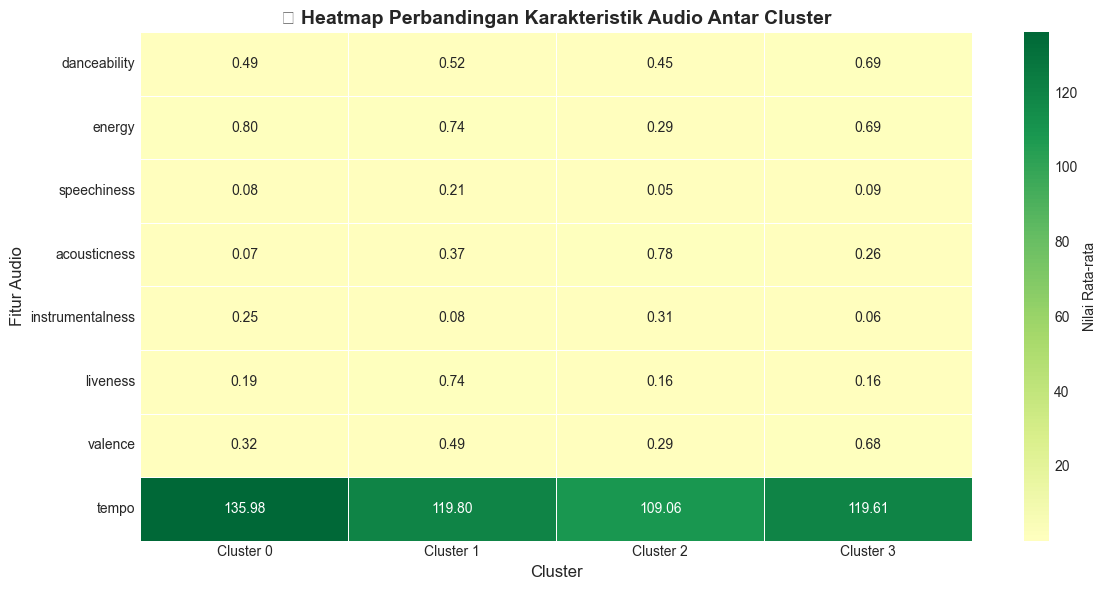


📝 CARA MEMBACA HEATMAP:
- Warna HIJAU = nilai tinggi
- Warna MERAH = nilai rendah
- Bisa langsung membandingkan fitur antar cluster


In [25]:
# ============================================================
# 8.3 HEATMAP PERBANDINGAN CLUSTER
# ============================================================

# Buat heatmap untuk membandingkan fitur antar cluster
fig, ax = plt.subplots(figsize=(12, 6))

# Transpose untuk cluster sebagai baris
heatmap_data = cluster_stats[clustering_features].T

sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.2f',
            cmap='RdYlGn',
            center=0.5,
            linewidths=0.5,
            ax=ax,
            cbar_kws={'label': 'Nilai Rata-rata'})

ax.set_xlabel('Cluster', fontsize=12)
ax.set_ylabel('Fitur Audio', fontsize=12)
ax.set_title('🔥 Heatmap Perbandingan Karakteristik Audio Antar Cluster', fontsize=14, fontweight='bold')

# Ubah label x-axis
ax.set_xticklabels([f'Cluster {i}' for i in range(optimal_k)])

plt.tight_layout()
plt.show()

print("\n📝 CARA MEMBACA HEATMAP:")
print("- Warna HIJAU = nilai tinggi")
print("- Warna MERAH = nilai rendah")
print("- Bisa langsung membandingkan fitur antar cluster")

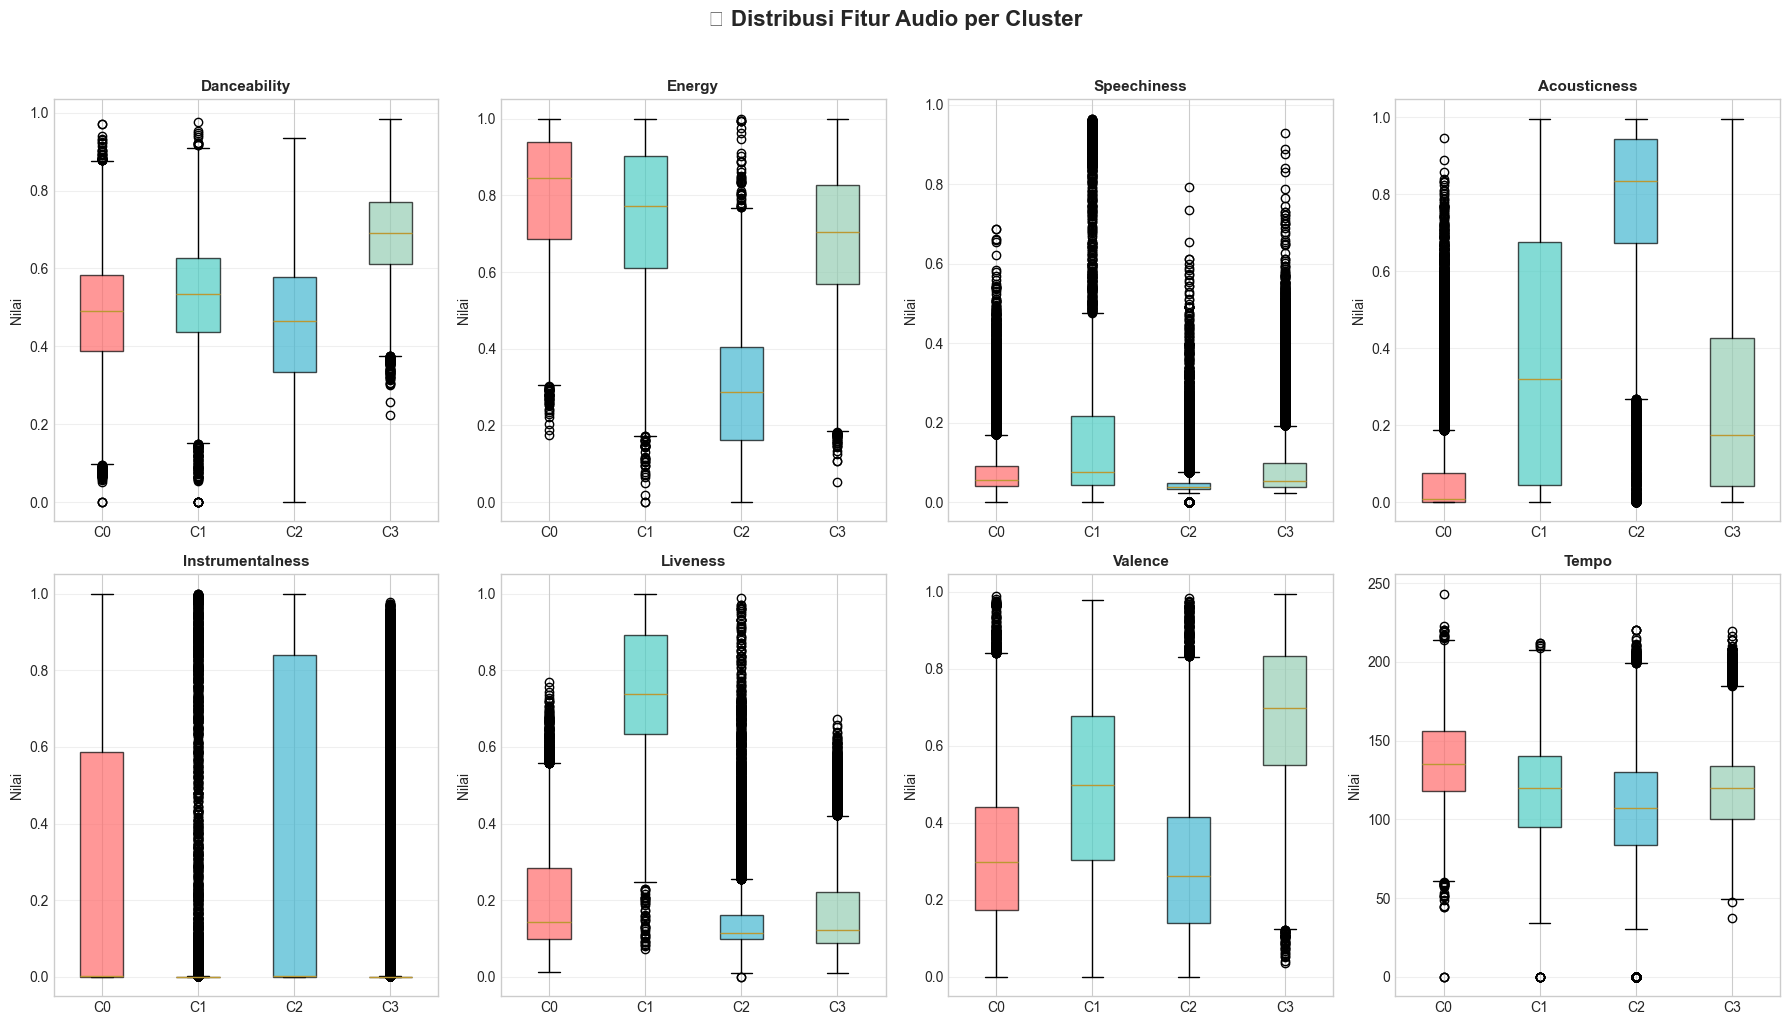

In [26]:
# ============================================================
# 8.4 BOX PLOT DISTRIBUSI FITUR PER CLUSTER
# ============================================================

fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(clustering_features):
    ax = axes[i]
    
    # Buat box plot per cluster
    box_data = [df_cluster[df_cluster['cluster'] == c][feature].values for c in range(optimal_k)]
    bp = ax.boxplot(box_data, patch_artist=True)
    
    # Warnai setiap box
    for j, box in enumerate(bp['boxes']):
        box.set_facecolor(cluster_colors[j])
        box.set_alpha(0.7)
    
    ax.set_xticklabels([f'C{c}' for c in range(optimal_k)])
    ax.set_title(feature.title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Nilai')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('📦 Distribusi Fitur Audio per Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

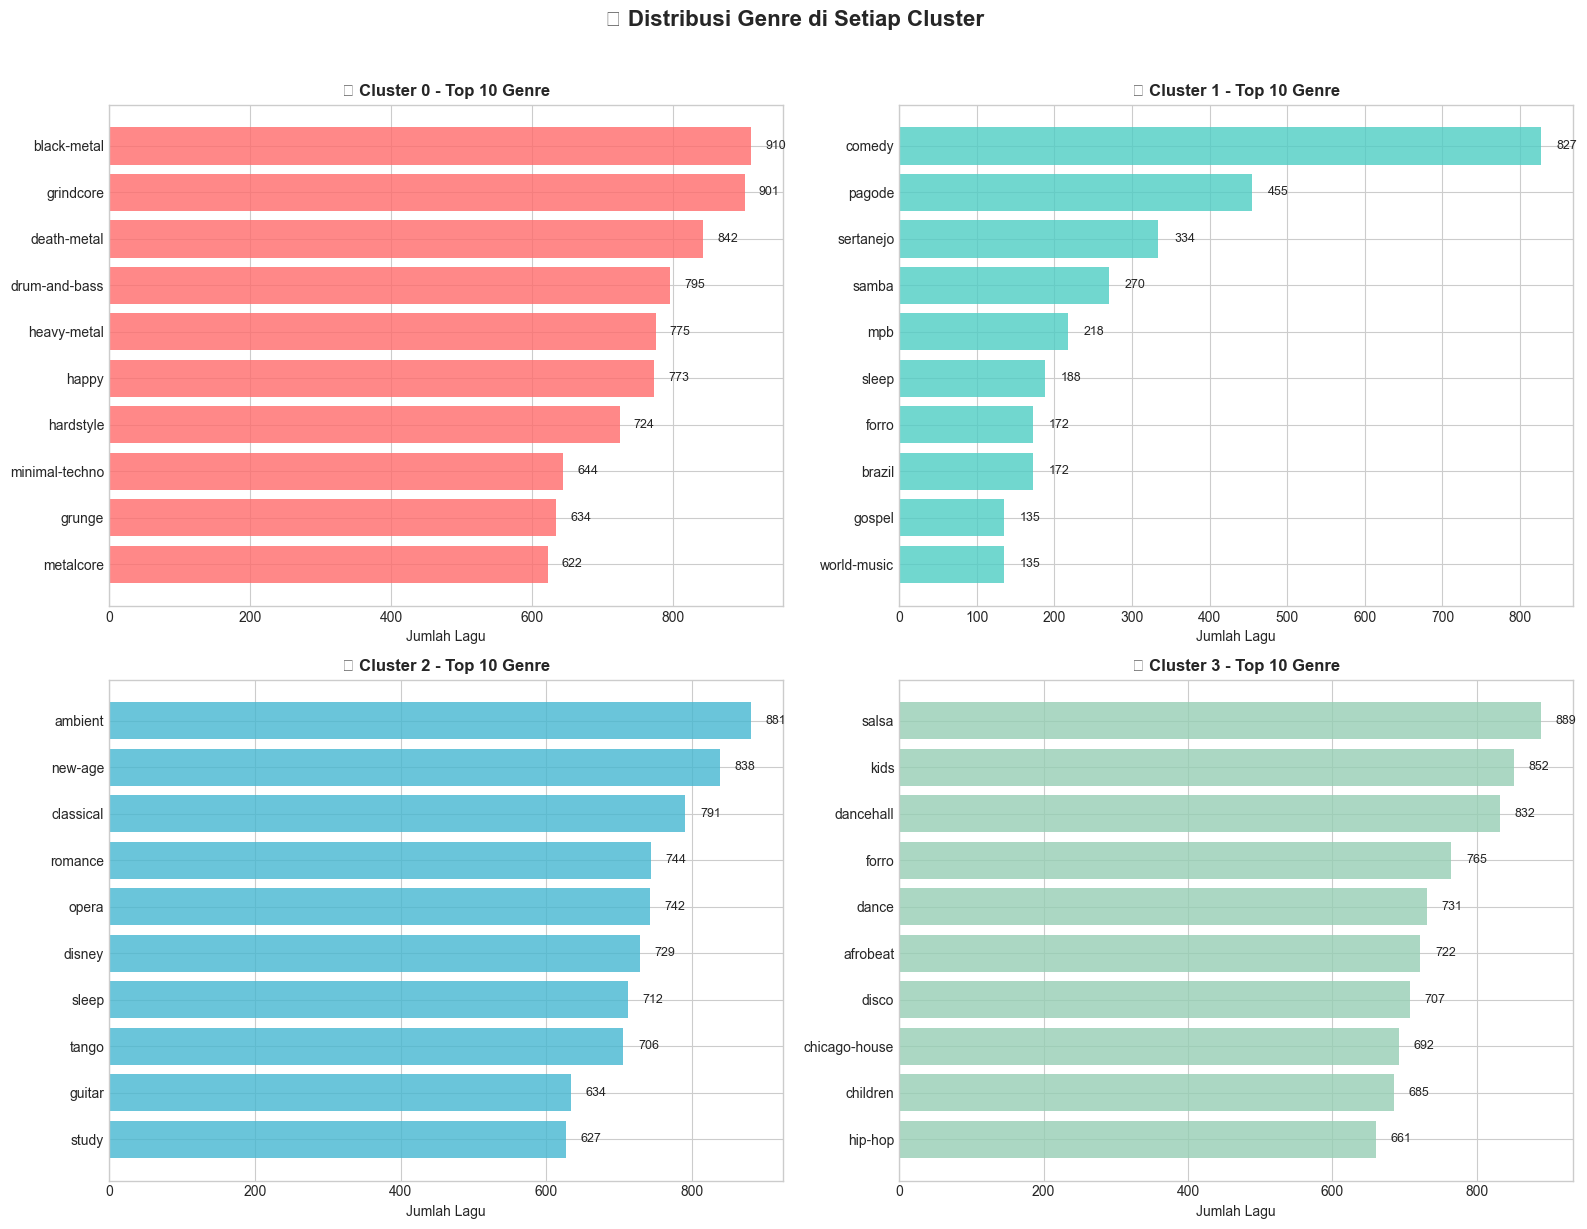

In [27]:
# ============================================================
# 8.5 ANALISIS GENRE PER CLUSTER
# ============================================================

# Distribusi genre di setiap cluster
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for cluster_id in range(optimal_k):
    ax = axes[cluster_id]
    
    # Filter data cluster ini
    cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
    
    # Top 10 genre dalam cluster ini
    top_genres_cluster = cluster_data['primary_genre'].value_counts().head(10)
    
    # Bar plot horizontal
    bars = ax.barh(range(len(top_genres_cluster)), top_genres_cluster.values, 
                   color=cluster_colors[cluster_id], alpha=0.8)
    ax.set_yticks(range(len(top_genres_cluster)))
    ax.set_yticklabels(top_genres_cluster.index)
    ax.set_xlabel('Jumlah Lagu')
    ax.set_title(f'🎸 Cluster {cluster_id} - Top 10 Genre', fontsize=12, fontweight='bold')
    ax.invert_yaxis()
    
    # Tambahkan nilai
    for bar, val in zip(bars, top_genres_cluster.values):
        ax.text(val + 20, bar.get_y() + bar.get_height()/2, f'{val:,}', 
               va='center', fontsize=9)

plt.suptitle('📊 Distribusi Genre di Setiap Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [28]:
# ============================================================
# 8.6 CONTOH LAGU DARI SETIAP CLUSTER
# ============================================================

print("🎵 CONTOH LAGU DARI SETIAP CLUSTER:")
print("="*80)

for cluster_id in range(optimal_k):
    print(f"\n🎯 CLUSTER {cluster_id}")
    print("-"*60)
    
    # Ambil 5 lagu random dari cluster (yang populer)
    cluster_songs = df_cluster[df_cluster['cluster'] == cluster_id].nlargest(5, 'popularity' if 'popularity' in df_cluster.columns else 'danceability')
    
    for idx, (_, song) in enumerate(cluster_songs.iterrows(), 1):
        track = song['track_name'][:40] + "..." if len(song['track_name']) > 40 else song['track_name']
        artist = song['artists'][:30] + "..." if len(song['artists']) > 30 else song['artists']
        genre = song['primary_genre']
        print(f"   {idx}. {track}")
        print(f"      🎤 {artist}")
        print(f"      🎸 Genre: {genre}")
        print()

🎵 CONTOH LAGU DARI SETIAP CLUSTER:

🎯 CLUSTER 0
------------------------------------------------------------
   1. The Music In Me - Original Mix
      🎤 Paul Johnson
      🎸 Genre: chicago-house

   2. Percolator - Claude VonStroke Must Have ...
      🎤 Cajmere;Claude VonStroke
      🎸 Genre: chicago-house

   3. AUTOMOTIVO DA FELICIDADE
      🎤 DJ Arthur ZL;DJ Arana
      🎸 Genre: funk

   4. Future (feat. Inner City) - MK AW Deep D...
      🎤 Kevin Saunderson;Inner City;MK
      🎸 Genre: detroit-techno

   5. BMK
      🎤 dj Shawny
      🎸 Genre: club


🎯 CLUSTER 1
------------------------------------------------------------
   1. Go Lay Lay Go
      🎤 That Girl Lay Lay
      🎸 Genre: kids

   2. Sugar Daddy
      🎤 Qveen Herby
      🎸 Genre: alternative

   3. Penguin Dance Chant
      🎤 Jack Hartmann
      🎸 Genre: kids

   4. Tu Só Foi Mais Uma
      🎤 MC Arraia;DJ Guih Da ZO
      🎸 Genre: funk

   5. Best Day of My Life
      🎤 Aunty Donna;Demi Lardner
      🎸 Genre: comedy


🎯 

---
## 🔄 Bagian 9: Perbandingan dengan Algoritma Clustering Lain (Opsional)

Selain K-Means, ada algoritma clustering lain yang bisa dicoba:
- **Hierarchical Clustering (Agglomerative)** - Membangun hirarki cluster
- **DBSCAN** - Density-based clustering

Mari kita bandingkan hasilnya!

In [30]:
# ============================================================
# 9.1 HIERARCHICAL CLUSTERING (AGGLOMERATIVE)
# ============================================================

print("🔄 Melatih Agglomerative Clustering...")
print("⚠️  Karena dataset besar (89,740 lagu), kita akan menggunakan sample untuk Agglomerative Clustering")

# Sample data untuk Agglomerative (karena membutuhkan banyak memori)
sample_size_agg = 5000
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), size=sample_size_agg, replace=False)
X_scaled_sample = X_scaled[sample_indices]

print(f"📊 Menggunakan {sample_size_agg:,} sample untuk Agglomerative Clustering")

# Agglomerative Clustering pada sample
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels_sample = agg_clustering.fit_predict(X_scaled_sample)

# Untuk full dataset, kita predict menggunakan nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_sample, agg_labels_sample)
agg_labels = knn.predict(X_scaled)

# Hitung silhouette score pada sample
agg_silhouette = silhouette_score(X_scaled_sample, agg_labels_sample)

# Hitung silhouette score
agg_silhouette = silhouette_score(X_scaled, agg_labels)

print(f"✅ Agglomerative Clustering selesai!")
print(f"📊 Silhouette Score: {agg_silhouette:.4f}")

# Distribusi cluster
print(f"\n📊 Distribusi Cluster (Agglomerative):")
for i in range(optimal_k):
    count = (agg_labels == i).sum()
    print(f"   Cluster {i}: {count:,} lagu")

🔄 Melatih Agglomerative Clustering...
⚠️  Karena dataset besar (89,740 lagu), kita akan menggunakan sample untuk Agglomerative Clustering
📊 Menggunakan 5,000 sample untuk Agglomerative Clustering
✅ Agglomerative Clustering selesai!
📊 Silhouette Score: 0.2059

📊 Distribusi Cluster (Agglomerative):
   Cluster 0: 51,648 lagu
   Cluster 1: 6,157 lagu
   Cluster 2: 11,780 lagu
   Cluster 3: 20,155 lagu


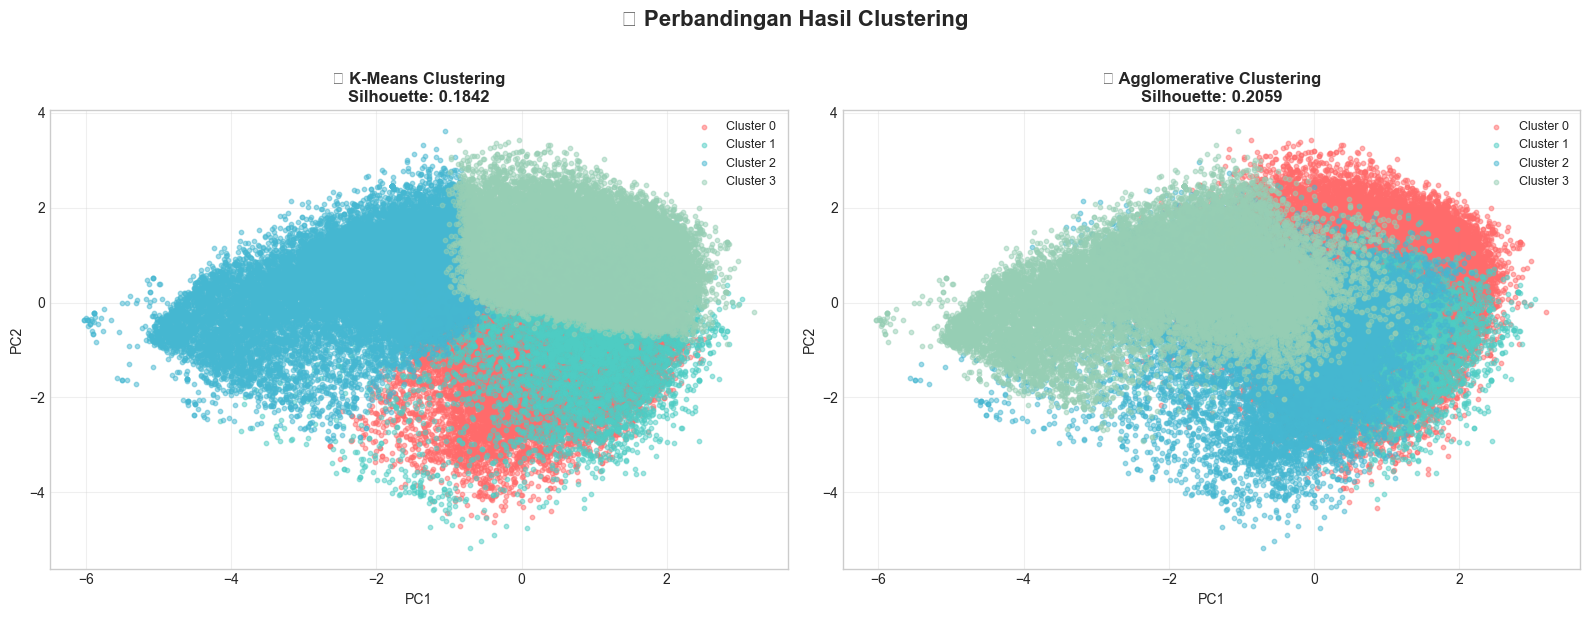

In [31]:
# ============================================================
# 9.2 PERBANDINGAN VISUAL HASIL CLUSTERING
# ============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means Results
ax1 = axes[0]
for i in range(optimal_k):
    mask = cluster_labels == i
    ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=cluster_colors[i], label=f'Cluster {i}', alpha=0.5, s=10)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_title(f'🤖 K-Means Clustering\nSilhouette: {silhouette_score(X_scaled, cluster_labels):.4f}', 
             fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Agglomerative Results
ax2 = axes[1]
for i in range(optimal_k):
    mask = agg_labels == i
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=cluster_colors[i], label=f'Cluster {i}', alpha=0.5, s=10)
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title(f'🌲 Agglomerative Clustering\nSilhouette: {agg_silhouette:.4f}', 
             fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.suptitle('📊 Perbandingan Hasil Clustering', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [32]:
# ============================================================
# 9.3 RINGKASAN PERBANDINGAN ALGORITMA
# ============================================================

# Buat tabel perbandingan
comparison_data = {
    'Algoritma': ['K-Means', 'Agglomerative'],
    'Silhouette Score': [
        silhouette_score(X_scaled, cluster_labels),
        agg_silhouette
    ],
    'Calinski-Harabasz': [
        calinski_harabasz_score(X_scaled, cluster_labels),
        calinski_harabasz_score(X_scaled, agg_labels)
    ],
    'Davies-Bouldin': [
        davies_bouldin_score(X_scaled, cluster_labels),
        davies_bouldin_score(X_scaled, agg_labels)
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("📊 PERBANDINGAN ALGORITMA CLUSTERING")
print("="*70)
print(comparison_df.to_string(index=False))

print("\n📝 INTERPRETASI:")
print("-"*70)
print("• Silhouette Score: Semakin tinggi semakin baik (max: 1)")
print("• Calinski-Harabasz: Semakin tinggi semakin baik")
print("• Davies-Bouldin: Semakin rendah semakin baik (min: 0)")

# Tentukan pemenang
best_silhouette = comparison_df.loc[comparison_df['Silhouette Score'].idxmax(), 'Algoritma']
best_davies = comparison_df.loc[comparison_df['Davies-Bouldin'].idxmin(), 'Algoritma']

print(f"\n🏆 Berdasarkan Silhouette Score: {best_silhouette}")
print(f"🏆 Berdasarkan Davies-Bouldin: {best_davies}")

📊 PERBANDINGAN ALGORITMA CLUSTERING
    Algoritma  Silhouette Score  Calinski-Harabasz  Davies-Bouldin
      K-Means          0.184205       17574.196181        1.665811
Agglomerative          0.205856       14199.387197        1.635598

📝 INTERPRETASI:
----------------------------------------------------------------------
• Silhouette Score: Semakin tinggi semakin baik (max: 1)
• Calinski-Harabasz: Semakin tinggi semakin baik
• Davies-Bouldin: Semakin rendah semakin baik (min: 0)

🏆 Berdasarkan Silhouette Score: Agglomerative
🏆 Berdasarkan Davies-Bouldin: Agglomerative


---
## 🎯 Bagian 10: Sistem Rekomendasi Sederhana

Dengan hasil clustering ini, kita bisa membuat **sistem rekomendasi lagu sederhana**:
- Jika user menyukai satu lagu, rekomendasikan lagu lain dari cluster yang sama!

In [33]:
# ============================================================
# 10.1 FUNGSI REKOMENDASI LAGU
# ============================================================

def recommend_songs(song_name, df, n_recommendations=5):
    """
    Merekomendasikan lagu berdasarkan cluster yang sama
    
    Parameters:
    -----------
    song_name : str
        Nama lagu yang disukai user (sebagian nama juga bisa)
    df : DataFrame
        DataFrame dengan hasil clustering
    n_recommendations : int
        Jumlah rekomendasi yang diinginkan
    
    Returns:
    --------
    DataFrame dengan lagu rekomendasi
    """
    # Cari lagu yang cocok dengan nama
    matching_songs = df[df['track_name'].str.lower().str.contains(song_name.lower())]
    
    if len(matching_songs) == 0:
        print(f"❌ Tidak ditemukan lagu dengan nama '{song_name}'")
        print("💡 Coba gunakan kata kunci yang lebih pendek")
        return None
    
    # Ambil lagu pertama yang cocok
    selected_song = matching_songs.iloc[0]
    selected_cluster = selected_song['cluster']
    
    print("="*60)
    print("🎵 LAGU YANG DIPILIH:")
    print("="*60)
    print(f"   📀 {selected_song['track_name']}")
    print(f"   🎤 {selected_song['artists']}")
    print(f"   🎸 Genre: {selected_song['primary_genre']}")
    print(f"   🏷️ Cluster: {selected_cluster}")
    print()
    
    # Ambil lagu lain dari cluster yang sama
    same_cluster = df[(df['cluster'] == selected_cluster) & 
                      (df['track_id'] != selected_song['track_id'])]
    
    # Random sample rekomendasi
    recommendations = same_cluster.sample(n=min(n_recommendations, len(same_cluster)), 
                                          random_state=42)
    
    print("="*60)
    print(f"🎯 REKOMENDASI LAGU (dari Cluster {selected_cluster}):")
    print("="*60)
    
    for idx, (_, song) in enumerate(recommendations.iterrows(), 1):
        print(f"\n   {idx}. {song['track_name']}")
        print(f"      🎤 {song['artists']}")
        print(f"      🎸 Genre: {song['primary_genre']}")
        print(f"      💃 Danceability: {song['danceability']:.2f} | ⚡ Energy: {song['energy']:.2f} | 😊 Valence: {song['valence']:.2f}")
    
    return recommendations

print("✅ Fungsi rekomendasi berhasil dibuat!")

✅ Fungsi rekomendasi berhasil dibuat!


In [34]:
# ============================================================
# 10.2 CONTOH PENGGUNAAN SISTEM REKOMENDASI
# ============================================================

# Gabungkan popularity ke df_cluster untuk rekomendasi
if 'popularity' not in df_cluster.columns:
    df_cluster = df_cluster.merge(df_aggregated[['track_id', 'popularity']], on='track_id', how='left')

# Contoh: Cari rekomendasi untuk lagu "Shape of You"
recommendations = recommend_songs("Shape of You", df_cluster, n_recommendations=5)

🎵 LAGU YANG DIPILIH:
   📀 Shape of You - Abheri - Shudha Dhanyasi - Adi Tala - Carnatic Mix
   🎤 IndianRaga;Mahesh Raghvan;Vinod Krishnan;Aditya Rao
   🎸 Genre: indian
   🏷️ Cluster: 3

🎯 REKOMENDASI LAGU (dari Cluster 3):

   1. Nauliza
      🎤 BaianaSystem;Makavelli;Jaymitta
      🎸 Genre: afrobeat
      💃 Danceability: 0.62 | ⚡ Energy: 0.94 | 😊 Valence: 0.76

   2. Too Tired
      🎤 Smartface
      🎸 Genre: study
      💃 Danceability: 0.80 | ⚡ Energy: 0.25 | 😊 Valence: 0.49

   3. Don’t Go (with Justin Bieber & Don Toliver)
      🎤 Skrillex;Justin Bieber;Don Toliver
      🎸 Genre: edm
      💃 Danceability: 0.69 | ⚡ Energy: 0.69 | 😊 Valence: 0.36

   4. Pictures
      🎤 Alex Schulz
      🎸 Genre: deep-house
      💃 Danceability: 0.76 | ⚡ Energy: 0.67 | 😊 Valence: 0.38

   5. Popotitos (with Charly García)
      🎤 Palito Ortega;Charly García
      🎸 Genre: rock-n-roll
      💃 Danceability: 0.66 | ⚡ Energy: 0.73 | 😊 Valence: 0.85


In [35]:
# Contoh lain: Cari rekomendasi untuk lagu yang berbeda
recommendations = recommend_songs("Someone Like You", df_cluster, n_recommendations=5)

🎵 LAGU YANG DIPILIH:
   📀 Galileo (Someone Like You)
   🎤 Josh Groban
   🎸 Genre: opera
   🏷️ Cluster: 2

🎯 REKOMENDASI LAGU (dari Cluster 2):

   1. Watermelon Sugar
      🎤 Andrew Foy
      🎸 Genre: guitar
      💃 Danceability: 0.69 | ⚡ Energy: 0.33 | 😊 Valence: 0.38

   2. Ghost Pong
      🎤 Emancipator
      🎸 Genre: trip-hop
      💃 Danceability: 0.66 | ⚡ Energy: 0.47 | 😊 Valence: 0.41

   3. Amémonos
      🎤 La Rondalla Tapatía
      🎸 Genre: guitar
      💃 Danceability: 0.48 | ⚡ Energy: 0.34 | 😊 Valence: 0.60

   4. Chorra (Remastered 2022)
      🎤 Carlos Gardel
      🎸 Genre: tango
      💃 Danceability: 0.69 | ⚡ Energy: 0.34 | 😊 Valence: 0.62

   5. Le veau d´or (sung in Russian) (Faust)
      🎤 Feodor Chaliapin
      🎸 Genre: romance
      💃 Danceability: 0.63 | ⚡ Energy: 0.28 | 😊 Valence: 0.76


---
## 📝 Bagian 11: Kesimpulan

### 🎯 Ringkasan Hasil

In [36]:
# ============================================================
# RINGKASAN HASIL CLUSTERING
# ============================================================

print("="*70)
print("📊 RINGKASAN HASIL ANALISIS CLUSTERING")
print("="*70)

print(f"""
📁 DATASET:
   • Total lagu awal: {len(df):,}
   • Total lagu setelah cleaning: {len(df_cluster):,}
   • Fitur yang digunakan: {len(clustering_features)} fitur audio

🤖 MODEL:
   • Algoritma: K-Means Clustering
   • Jumlah Cluster: {optimal_k}
   • Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}

📈 DISTRIBUSI CLUSTER:
""")

for i in range(optimal_k):
    count = (cluster_labels == i).sum()
    pct = count / len(cluster_labels) * 100
    print(f"   • Cluster {i}: {count:,} lagu ({pct:.1f}%)")

print(f"""
🎯 FITUR CLUSTERING:
   {', '.join(clustering_features)}

✅ OUTPUT:
   • Visualisasi cluster 2D (PCA)
   • Profil karakteristik audio per cluster
   • Sistem rekomendasi lagu sederhana
""")

print("="*70)

📊 RINGKASAN HASIL ANALISIS CLUSTERING

📁 DATASET:
   • Total lagu awal: 114,000
   • Total lagu setelah cleaning: 89,740
   • Fitur yang digunakan: 8 fitur audio

🤖 MODEL:
   • Algoritma: K-Means Clustering
   • Jumlah Cluster: 4
   • Silhouette Score: 0.1842

📈 DISTRIBUSI CLUSTER:

   • Cluster 0: 26,586 lagu (29.6%)
   • Cluster 1: 7,136 lagu (8.0%)
   • Cluster 2: 20,535 lagu (22.9%)
   • Cluster 3: 35,483 lagu (39.5%)

🎯 FITUR CLUSTERING:
   danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence, tempo

✅ OUTPUT:
   • Visualisasi cluster 2D (PCA)
   • Profil karakteristik audio per cluster
   • Sistem rekomendasi lagu sederhana



### 📚 Penjelasan Untuk Pemula

**Apa yang Kita Lakukan?**
1. ✅ Memuat dan membersihkan data lagu dari Spotify
2. ✅ Mengeksplorasi karakteristik lagu (EDA)
3. ✅ Mengelompokkan lagu ke dalam cluster berdasarkan kemiripan karakteristik audio
4. ✅ Menganalisis perbedaan setiap cluster
5. ✅ Membuat sistem rekomendasi sederhana

**Mengapa Clustering Berguna?**
- 🎵 **Personalisasi Playlist**: Membuat playlist berdasarkan mood atau karakteristik musik
- 🎯 **Rekomendasi Musik**: Merekomendasikan lagu serupa dengan yang disukai user
- 📊 **Analisis Pasar**: Memahami pola dan tren musik
- 🔍 **Musik Discovery**: Menemukan lagu baru yang mungkin disukai

**Langkah Selanjutnya?**
- Coba ubah jumlah cluster (K) dan lihat perbedaannya
- Eksperimen dengan fitur berbeda untuk clustering
- Kombinasikan dengan data tambahan (lirik, tahun rilis, dll.)
- Bangun sistem rekomendasi yang lebih canggih

In [37]:
# ============================================================
# SIMPAN HASIL CLUSTERING
# ============================================================

# Simpan hasil clustering ke file CSV
output_file = 'hasil_clustering_lagu.csv'
df_cluster.to_csv(output_file, index=False)

print(f"✅ Hasil clustering berhasil disimpan ke '{output_file}'")
print(f"📊 Total {len(df_cluster):,} lagu dengan label cluster")

✅ Hasil clustering berhasil disimpan ke 'hasil_clustering_lagu.csv'
📊 Total 89,740 lagu dengan label cluster


---
## 🙏 Terima Kasih!

Notebook ini dibuat untuk membantu memahami konsep **Clustering** dengan cara yang mudah dipahami.

### 📖 Referensi:
- [Spotify Tracks Dataset - Kaggle](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset)
- [Scikit-learn Clustering Documentation](https://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Explained](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/)

### 🔧 Tools yang Digunakan:
- Python 3.x
- Pandas, NumPy
- Matplotlib, Seaborn, Plotly
- Scikit-learn

---
*Happy Learning! 🎵*